In [13]:
from config.constants import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import datetime
import os
import matplotlib.style
from pandas.core.common import flatten
from functools import partial, reduce
import sys
sys.path.append('../../')

In [14]:
plt.style.use('ggplot')

In [15]:
PATH_DATA

'../../data/'

In [16]:
CURRENCY_PAIRS

['EURUSD/EURUSD_H4 - EURUSD_H4',
 'AUDUSD/AUDUSD_H4 - AUDUSD_H4',
 'GBPUSD/GBPUSD_H4 - GBPUSD_H4',
 'NZDUSD/NZDUSD_H4 - NZDUSD_H4',
 'USDCAD/USDCAD_H4 - USDCAD_H4',
 'USDCHF/USDCHF_H4 - USDCHF_H4',
 'USDJPY/USDJPY_H4 - USDJPY_H4',
 'XAUUSD/XAUUSD_H4 - XAUUSD_H4']

In [17]:
pairs_list = [
    'EURUSD/EURUSD_H4 - EURUSD_H4',
    'AUDUSD/AUDUSD_H4 - AUDUSD_H4',
    'GBPUSD/GBPUSD_H4 - GBPUSD_H4',
    'NZDUSD/NZDUSD_H4 - NZDUSD_H4',
    'USDCAD/USDCAD_H4 - USDCAD_H4',
    'USDCHF/USDCHF_H4 - USDCHF_H4',
    'USDJPY/USDJPY_H4 - USDJPY_H4',
    'XAUUSD/XAUUSD_H4 - XAUUSD_H4',
]

In [18]:
df = {}
for pair in range(len(CURRENCY_PAIRS)):
    df[pair] = pd.read_csv(PATH_DATA + CURRENCY_PAIRS[pair] +
                           '.csv', index_col=0, parse_dates=True)
    df[pair]['Day'] = df[pair].index.dayofweek
    dmap = {0: 'Mon', 1: 'Tue', 2: 'Wed',
            3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
    df[pair]['Day'] = df[pair]['Day'].map(dmap)

In [19]:
df

{0:                         Open     High      Low    Close   Volume  Day
 Time                                                                 
 2007-03-05 12:00:00  1.30956  1.31145  1.30723  1.30979   185987  Mon
 2007-03-05 16:00:00  1.30960  1.31112  1.30833  1.30981  1025327  Mon
 2007-03-05 20:00:00  1.30979  1.30986  1.30782  1.30840   235967  Mon
 2007-03-06 00:00:00  1.30813  1.31113  1.30798  1.31071   191415  Tue
 2007-03-06 04:00:00  1.31078  1.31262  1.30923  1.31211   187099  Tue
 ...                      ...      ...      ...      ...      ...  ...
 2023-03-10 00:00:00  1.05855  1.05993  1.05791  1.05967    62976  Fri
 2023-03-10 04:00:00  1.05967  1.06066  1.05809  1.05948    58412  Fri
 2023-03-10 08:00:00  1.05946  1.06036  1.05738  1.05894    86765  Fri
 2023-03-10 12:00:00  1.05896  1.07004  1.05806  1.06872   219311  Fri
 2023-03-10 16:00:00  1.06873  1.06873  1.06551  1.06585    43114  Fri
 
 [25846 rows x 6 columns],
 1:                         Open     High    

In [20]:
mask = df[0]['Day'] == 'Sun'

# Use the mask to filter the DataFrame and get only the rows where 'Day' is 'Sun'
sundays_df = df[0][mask]
sundays_df

Open     High      Low    Close  Volume  Day
Time                                                                
2007-03-11 20:00:00  1.31236  1.31415  1.31068  1.31242  144952  Sun
2007-03-18 20:00:00  1.33064  1.33196  1.33064  1.33161  140627  Sun
2007-03-25 20:00:00  1.32801  1.32933  1.32571  1.32708  191699  Sun
2007-04-01 20:00:00  1.33710  1.33770  1.33520  1.33540   60580  Sun
2007-04-08 20:00:00  1.33740  1.33798  1.33635  1.33680   30738  Sun
...                      ...      ...      ...      ...     ...  ...
2023-02-05 20:00:00  1.07820  1.07981  1.07817  1.07891   17051  Sun
2023-02-12 20:00:00  1.06808  1.06821  1.06708  1.06771    9209  Sun
2023-02-19 20:00:00  1.06849  1.06933  1.06822  1.06838   16737  Sun
2023-02-26 20:00:00  1.05451  1.05550  1.05439  1.05533    6405  Sun
2023-03-05 20:00:00  1.06228  1.06288  1.06228  1.06254    8871  Sun

[834 rows x 6 columns]

In [21]:
df[0]

Open     High      Low    Close   Volume  Day
Time                                                                 
2007-03-05 12:00:00  1.30956  1.31145  1.30723  1.30979   185987  Mon
2007-03-05 16:00:00  1.30960  1.31112  1.30833  1.30981  1025327  Mon
2007-03-05 20:00:00  1.30979  1.30986  1.30782  1.30840   235967  Mon
2007-03-06 00:00:00  1.30813  1.31113  1.30798  1.31071   191415  Tue
2007-03-06 04:00:00  1.31078  1.31262  1.30923  1.31211   187099  Tue
...                      ...      ...      ...      ...      ...  ...
2023-03-10 00:00:00  1.05855  1.05993  1.05791  1.05967    62976  Fri
2023-03-10 04:00:00  1.05967  1.06066  1.05809  1.05948    58412  Fri
2023-03-10 08:00:00  1.05946  1.06036  1.05738  1.05894    86765  Fri
2023-03-10 12:00:00  1.05896  1.07004  1.05806  1.06872   219311  Fri
2023-03-10 16:00:00  1.06873  1.06873  1.06551  1.06585    43114  Fri

[25846 rows x 6 columns]

In [22]:
# pairs_list = []
# for filename in os.listdir(path):
#     if filename.endswith('.csv'):
#         pairs_list.append(filename.split('.')[0])
# print(pairs_list)

# df = {}
# for pair in range(len(pairs_list)):
#     df[pair] = pd.read_csv(pairs_list[pair]+'.csv', header = 0)
#     df[pair].columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
#     df[pair]['Date'] = df[pair]['Date'].str.split(' ').str[0:2]
#     df[pair]['Date'] = df[pair]['Date'].str.join(' ')
#     df[pair].set_index('Date', inplace = True)
#     df[pair].index = pd.to_datetime(df[pair].index, format = '%d.%m.%Y %H:%M:%S.%f')
#     df[pair]['Day'] = df[pair].index.dayofweek
#     dmap = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
#     df[pair]['Day'] = df[pair]['Day'].map(dmap)

In [23]:
def ATR(df, n):
    df = df.copy()
    df['High-Low'] = abs(df['High'] - df['Low'])
    df['High-PrevClose'] = abs(df['High'] - df['Close'].shift(1))
    df['Low-PrevClose'] = abs(df['Low'] - df['Close'].shift(1))
    df['TR'] = df[['High-Low', 'High-PrevClose',
                   'Low-PrevClose']].max(axis=1, skipna=False)
    df['ATR'] = df['TR'].rolling(n).mean()
    df = df.drop(['High-Low', 'High-PrevClose', 'Low-PrevClose'], axis=1)
    return df


def CAGR(df, source_df, account_size):
    df = df.copy()
    n = len(source_df) / (252*24)
    return round((((df['cum_res'][-1] / account_size)**(1/n)) - 1) * 100, 1)


def sharpe_ratio(df):
    df = df.copy()
    returns = df['cum_res'].pct_change()
    volatility = returns.std() * np.sqrt(252)
    return round((returns.mean() - 0.02) / volatility, 2)


def max_drawdown(df):
    df = df.copy()
    cum_returns = (1 + df['cum_res']).cumprod()
    drawdown = 1 - df['cum_res'].div(df['cum_res'].cummax())
    return round(max(drawdown.expanding().max() * 100), 2)

In [24]:
# Strategy parameters
account_size = 1000
slippage = 2
size = 1
ATR_SL = 0.5

for pair in range(len(pairs_list)):
    df[pair]['ATR'] = ATR(df[pair], 20)['ATR']
    df[pair]['direction'] = np.where(
        df[pair]['Close'] > df[pair]['Open'], 'bull', 'bear')
    df[pair]['dir_count'] = df[pair].groupby(
        (df[pair]['direction'] != df[pair]['direction'].shift(1)).cumsum()).cumcount()+1
    if 'USDJPY/USDJPY_H4 - USDJPY_H4' not in pairs_list[pair] and 'XAUUSD/XAUUSD_H4 - XAUUSD_H4' not in pairs_list[pair]:
        df[pair]['spread'] = float(slippage) / float(10000)
        df[pair]['size'] = float(size) * float(10000)
        print('Pair: ', pairs_list[pair], 'a')

    else:
        df[pair]['spread'] = float(slippage) / float(100)
        df[pair]['size'] = float(size) * float(100)
        print('Pair: ', pairs_list[pair], 'b')

Pair:  EURUSD/EURUSD_H4 - EURUSD_H4 a
Pair:  AUDUSD/AUDUSD_H4 - AUDUSD_H4 a
Pair:  GBPUSD/GBPUSD_H4 - GBPUSD_H4 a
Pair:  NZDUSD/NZDUSD_H4 - NZDUSD_H4 a
Pair:  USDCAD/USDCAD_H4 - USDCAD_H4 a
Pair:  USDCHF/USDCHF_H4 - USDCHF_H4 a
Pair:  USDJPY/USDJPY_H4 - USDJPY_H4 b
Pair:  XAUUSD/XAUUSD_H4 - XAUUSD_H4 b


In [25]:
open_trade = {}
trade = {}
long_take_profit = {}
short_take_profit = {}
long_stop_loss = {}
short_stop_loss = {}
long_entry_price = {}
short_entry_price = {}

for pair in range(len(pairs_list)):
    open_trade[pair] = []
    trade[pair] = {}
    long_take_profit[pair] = []
    short_take_profit[pair] = []
    long_stop_loss[pair] = []
    short_stop_loss[pair] = []
    long_entry_price[pair] = []
    short_entry_price[pair] = []

    for i in range(50, len(df[pair])):
        # Buy
        if df[pair]['dir_count'][i - 1] >= 5 and df[pair]['direction'][i - 1] == 'bull' and len(open_trade[pair]) == 0:
            print(i, 'New Long trade at price:', round(
                df[pair]['Close'][i], 4), ' On day:', df[pair].index[i], 'Pair:', pairs_list[pair])
            trade[pair][i] = {'ID': i,
                              'date_of_trade': df[pair].index[i],
                              'day_of_trade': df[pair]['Day'][i],
                              'entry_price': df[pair]['Close'][i],
                              'signal': 'Buy',
                              'result': 0,
                              'TP': df[pair]['Close'][i] + df[pair]['ATR'][i] * ATR_SL,
                              'SL': df[pair]['Open'][i]}
            open_trade[pair].append(i)
            long_take_profit[pair].append(trade[pair][i]['TP'])
            long_stop_loss[pair].append(trade[pair][i]['SL'])
            long_entry_price[pair].append(trade[pair][i]['entry_price'])

        # Sell
        if df[pair]['dir_count'][i - 1] >= 5 and df[pair]['direction'][i - 1] == 'bear' and len(open_trade[pair]) == 0:
            print(i, 'New Short trade at price:', round(
                df[pair]['Close'][i], 4), ' On day:', df[pair].index[i], 'Pair:', pairs_list[pair])
            trade[pair][i] = {'ID': i,
                              'date_of_trade': df[pair].index[i],
                              'day_of_trade': df[pair]['Day'][i],
                              'entry_price': df[pair]['Close'][i],
                              'signal': 'Sell',
                              'result': 0,
                              'TP': df[pair]['Close'][i] - df[pair]['ATR'][i] * ATR_SL,
                              'SL': df[pair]['Open'][i]}
            open_trade[pair].append(i)
            short_take_profit[pair].append(trade[pair][i]['TP'])
            short_stop_loss[pair].append(trade[pair][i]['SL'])
            short_entry_price[pair].append(trade[pair][i]['entry_price'])

        # Exit trades---------------------------------------------------------------------------
        # Buy profit
        if any(y <= df[pair]['Close'][i] for y in long_take_profit[pair]):
            for j in open_trade[pair]:
                if trade[pair][j].get('result', {}) == 0 and trade[pair][j].get('signal', {}) == 'Buy':
                    if df[pair]['Close'][i] >= trade[pair][j]['TP']:
                        trade[pair][j].update({'result': (
                            trade[pair][j]['TP'] - trade[pair][j]['entry_price'] - df[pair]['spread'][i]) * df[pair]['size'][i]})
                        print(j,
                              'Long profit at price:', round(
                                  df[pair]['Close'][i], 4),
                              'On day:', df[pair].index[i],
                              'With profit:', round(trade[pair][j]['result'], 4), '\n')
                        open_trade[pair].remove(j)
                        long_take_profit[pair].remove(trade[pair][j]['TP'])
                        long_stop_loss[pair].remove(trade[pair][j]['SL'])
        # Buy loss
        if any(y >= df[pair]['Close'][i] for y in long_stop_loss[pair]):
            for j in open_trade[pair]:
                if trade[pair][j].get('result', {}) == 0 and trade[pair][j].get('signal', {}) == 'Buy':
                    if df[pair]['Close'][i] <= trade[pair][j]['SL']:
                        trade[pair][j].update({'result': (
                            trade[pair][j]['SL'] - trade[pair][j]['entry_price'] - df[pair]['spread'][i]) * df[pair]['size'][i]})
                        print(j,
                              'Long loss at price:', round(
                                  df[pair]['Close'][i], 4),
                              'On day:', df[pair].index[i],
                              'With loss:', round(trade[pair][j]['result'], 4), '\n')
                        open_trade[pair].remove(j)
                        long_take_profit[pair].remove(trade[pair][j]['TP'])
                        long_stop_loss[pair].remove(trade[pair][j]['SL'])

        # Sell profit
        if any(y >= df[pair]['Close'][i] for y in short_take_profit[pair]):
            for j in open_trade[pair]:
                if trade[pair][j].get('result', {}) == 0 and trade[pair][j].get('signal', {}) == 'Sell':
                    if df[pair]['Close'][i] <= trade[pair][j]['TP']:
                        trade[pair][j].update({'result': (
                            trade[pair][j]['entry_price'] - trade[pair][j]['TP'] - df[pair]['spread'][i]) * df[pair]['size'][i]})
                        print(j,
                              'Short profit at price:', round(
                                  df[pair]['Close'][i], 4),
                              'On day:', df[pair].index[i],
                              'With profit:', round(trade[pair][j]['result'], 4), '\n')
                        open_trade[pair].remove(j)
                        short_take_profit[pair].remove(trade[pair][j]['TP'])
                        short_stop_loss[pair].remove(trade[pair][j]['SL'])
        # Sell loss
        if any(y <= df[pair]['Close'][i] for y in short_stop_loss[pair]):
            for j in open_trade[pair]:
                if trade[pair][j].get('result', {}) == 0 and trade[pair][j].get('signal', {}) == 'Sell':
                    if df[pair]['Close'][i] >= trade[pair][j]['SL']:
                        trade[pair][j].update({'result': (
                            trade[pair][j]['entry_price'] - trade[pair][j]['SL'] - df[pair]['spread'][i]) * df[pair]['size'][i]})
                        print(j,
                              'Short loss at price:', round(
                                  df[pair]['Close'][i], 4),
                              'On day:', df[pair].index[i],
                              'With loss:', round(trade[pair][j]['result'], 4), '\n')
                        open_trade[pair].remove(j)
                        short_take_profit[pair].remove(trade[pair][j]['TP'])
                        short_stop_loss[pair].remove(trade[pair][j]['SL'])
        # Exit after time
        if len(open_trade[pair]) != 0:
            for j in open_trade[pair]:
                if (i - trade[pair][j]['ID']) >= 12 and trade[pair][j].get('result', {}) == 0 and trade[pair][j].get('signal', {}) == 'Buy':
                    trade[pair][j].update({'result': (
                        df[pair]['Close'][i] - trade[pair][j]['entry_price'] - df[pair]['spread'][i]) * df[pair]['size'][i]})
                    print(j,
                          'Long exited after 12 hours:', round(
                              df[pair]['Close'][i], 4),
                          'On day:', df[pair].index[i],
                          'With profit:', round(trade[pair][j]['result'], 4), '\n')
                    open_trade[pair].remove(j)
                    long_take_profit[pair].remove(trade[pair][j]['TP'])
                    long_stop_loss[pair].remove(trade[pair][j]['SL'])
                elif (i - trade[pair][j]['ID']) >= 12 and trade[pair][j].get('result', {}) == 0 and trade[pair][j].get('signal', {}) == 'Sell':
                    trade[pair][j].update({'result': (
                        trade[pair][j]['entry_price'] - df[pair]['Close'][i] - df[pair]['spread'][i]) * df[pair]['size'][i]})
                    print(j,
                          'Short exited after 12 hours:', round(
                              df[pair]['Close'][i], 4),
                          'On day:', df[pair].index[i],
                          'With profit:', round(trade[pair][j]['result'], 4), '\n')
                    open_trade[pair].remove(j)
                    short_take_profit[pair].remove(trade[pair][j]['TP'])
                    short_stop_loss[pair].remove(trade[pair][j]['SL'])

82 New Short trade at price: 1.3328  On day: 2007-03-22 20:00:00 Pair: EURUSD/EURUSD_H4 - EURUSD_H4
82 Short profit at price: 1.3312 On day: 2007-03-23 08:00:00 With profit: 13.2575 

90 New Short trade at price: 1.3261  On day: 2007-03-26 00:00:00 Pair: EURUSD/EURUSD_H4 - EURUSD_H4
90 Short loss at price: 1.3334 On day: 2007-03-26 12:00:00 With loss: -13.7 

138 New Long trade at price: 1.3374  On day: 2007-04-04 20:00:00 Pair: EURUSD/EURUSD_H4 - EURUSD_H4
138 Long loss at price: 1.3367 On day: 2007-04-05 00:00:00 With loss: -6.0 

178 New Long trade at price: 1.3538  On day: 2007-04-13 08:00:00 Pair: EURUSD/EURUSD_H4 - EURUSD_H4
178 Long loss at price: 1.3516 On day: 2007-04-13 12:00:00 With loss: -17.5 

188 New Short trade at price: 1.3527  On day: 2007-04-16 20:00:00 Pair: EURUSD/EURUSD_H4 - EURUSD_H4
188 Short loss at price: 1.3549 On day: 2007-04-17 08:00:00 With loss: -18.0 

194 New Long trade at price: 1.3572  On day: 2007-04-17 20:00:00 Pair: EURUSD/EURUSD_H4 - EURUSD_H4
194

In [26]:
pairs_results = {}
profits = {}
losses = {}
be = {}

for pair in range(len(pairs_list)):
    profits[pair] = []
    losses[pair] = []
    be[pair] = []

    pairs_results[pair] = pd.DataFrame.from_dict(
        {(i, j): trade[pair][j] for j in trade[pair].keys()}, orient='index')
    pairs_results[pair] = pairs_results[pair].drop(
        ['signal', 'ID', 'TP', 'SL'], axis=1)
    pairs_results[pair].set_index('date_of_trade', inplace=True)
    pairs_results[pair]['cum_res'] = pairs_results[pair]['result'].cumsum() + \
        account_size

    for t in trade[pair]:
        profits[pair].append(trade[pair][t]['result']
                             ) if trade[pair][t]['result'] > 0.1 else ''
        losses[pair].append(trade[pair][t]['result']
                            ) if trade[pair][t]['result'] < -0.1 else ''
        be[pair].append(trade[pair][t]['result']) if - \
            0.1 <= trade[pair][t]['result'] <= 0.1 else ''

my_reduce = partial(pd.merge, on='date_of_trade', how='outer')
strategy_results = reduce(my_reduce, pairs_results.values())
strategy_results = strategy_results.sort_index()
strategy_results['final_res'] = strategy_results.filter(
    like='result', axis=1).sum(axis=1)
strategy_results['cum_res'] = strategy_results['final_res'].cumsum() + \
    account_size

profits_keys = list(profits.keys())
profits_values = [profits[x] for x in profits_keys]
str_profits = list(flatten(profits_values))

losses_keys = list(losses.keys())
losses_values = [losses[x] for x in losses_keys]
str_losses = list(flatten(losses_values))

be_keys = list(be.keys())
be_values = [be[x] for x in be_keys]
str_be = list(flatten(be_values))

C:\Users\Win10\AppData\Local\Temp\ipykernel_7820\3987176436.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'entry_price_x', 'cum_res_x', 'day_of_trade_x', 'result_x'} in the result is deprecated and will raise a MergeError in a future version.
  strategy_results = reduce(my_reduce, pairs_results.values())
C:\Users\Win10\AppData\Local\Temp\ipykernel_7820\3987176436.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'entry_price_x', 'cum_res_x', 'day_of_trade_x', 'result_x'} in the result is deprecated and will raise a MergeError in a future version.
  strategy_results = reduce(my_reduce, pairs_results.values())
C:\Users\Win10\AppData\Local\Temp\ipykernel_7820\3987176436.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'entry_price_x', 'cum_res_x', 'day_of_trade_x', 'result_x'} in the result is deprecated and will raise a MergeError in a future version.
  strategy_results = reduce(my_reduce, pairs_results.values())


Text(0.5, 1.0, 'Returns of each pair')

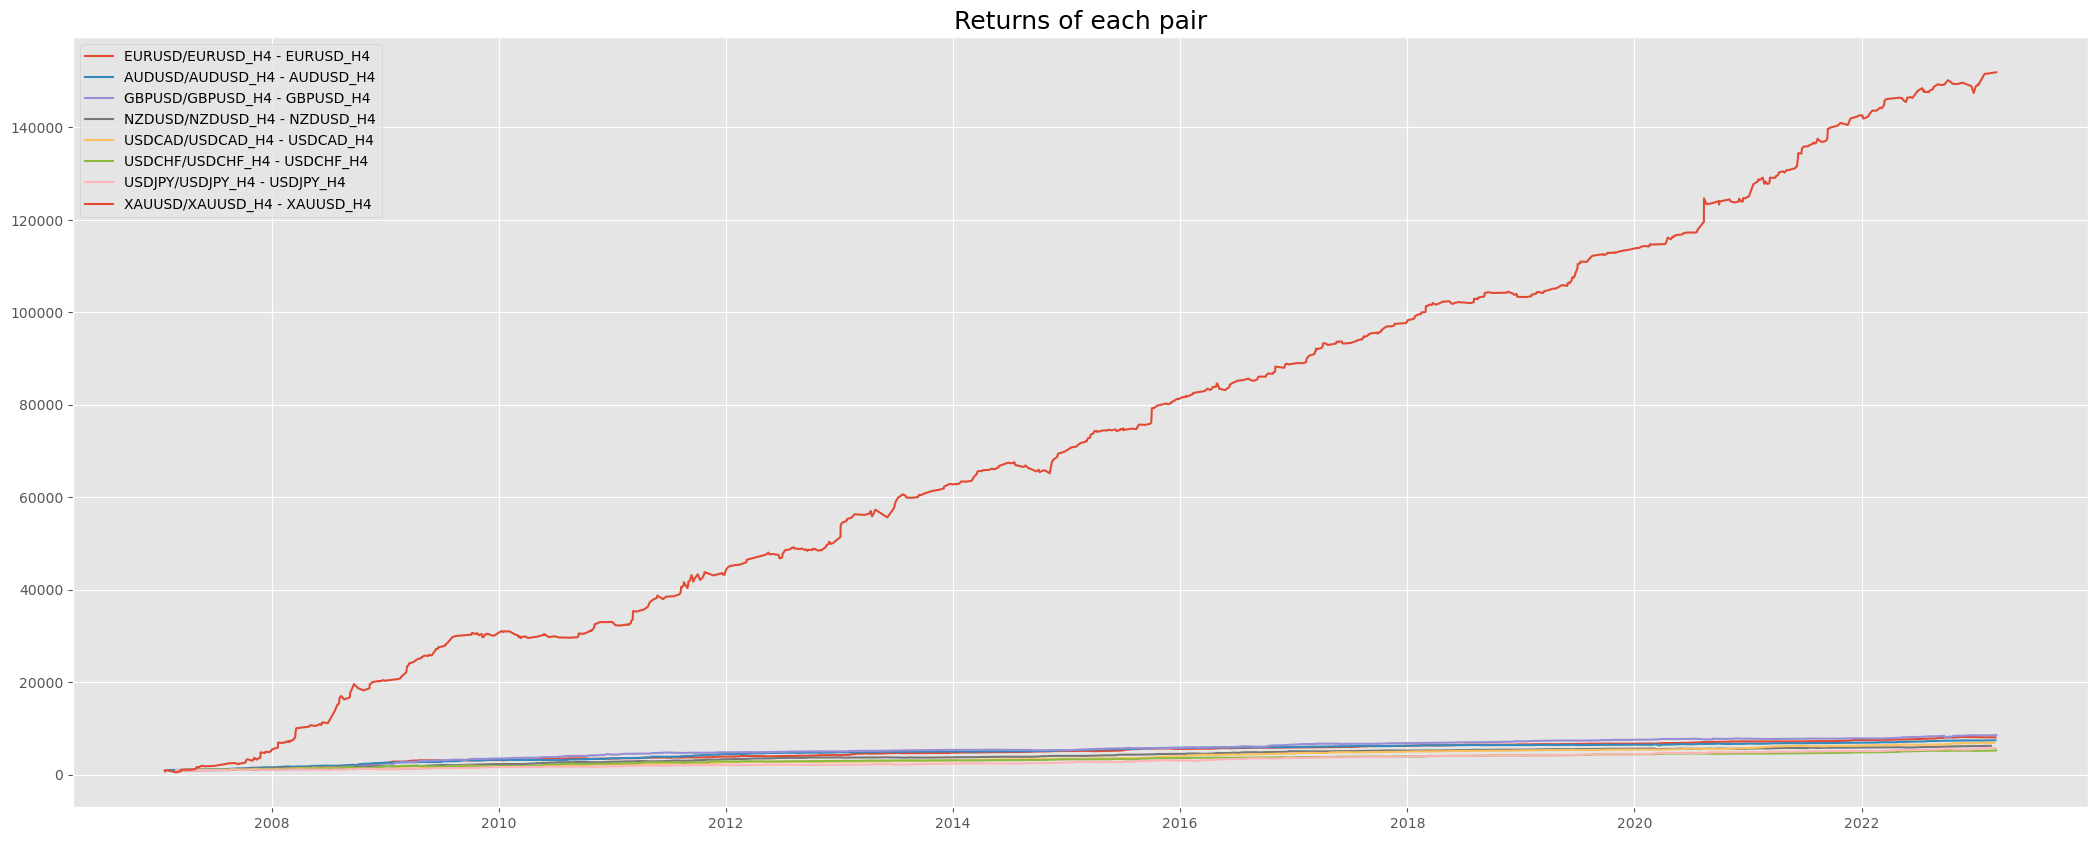

In [27]:
plt.figure(figsize=(26, 10))
for pair in range(len(pairs_list)):
    plt.plot(pairs_results[pair]['cum_res'], label=pairs_list[pair])
plt.legend()
plt.title('Returns of each pair', fontsize=18)

***** STRATEGY PERFORMANCE *****
--------------------------------
CAGR: 242.8 %
Sharpe ratio: -0.08
Maximum drawdown 45.75 % 

Number of trades: 6546
Number of profits: 4526
Number of losses: 1980
Number of breakevens: 40 

Winning percentage 69.57 %
ROI: 192382
--------------------------------
Average profitable trade: 60.28
Average lossing trade: -40.62
Max profitable trade: 5140.0
Max lossing trade: -1672.0


c:\Users\Win10\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)


Text(0.5, 1.0, 'return of strategy')

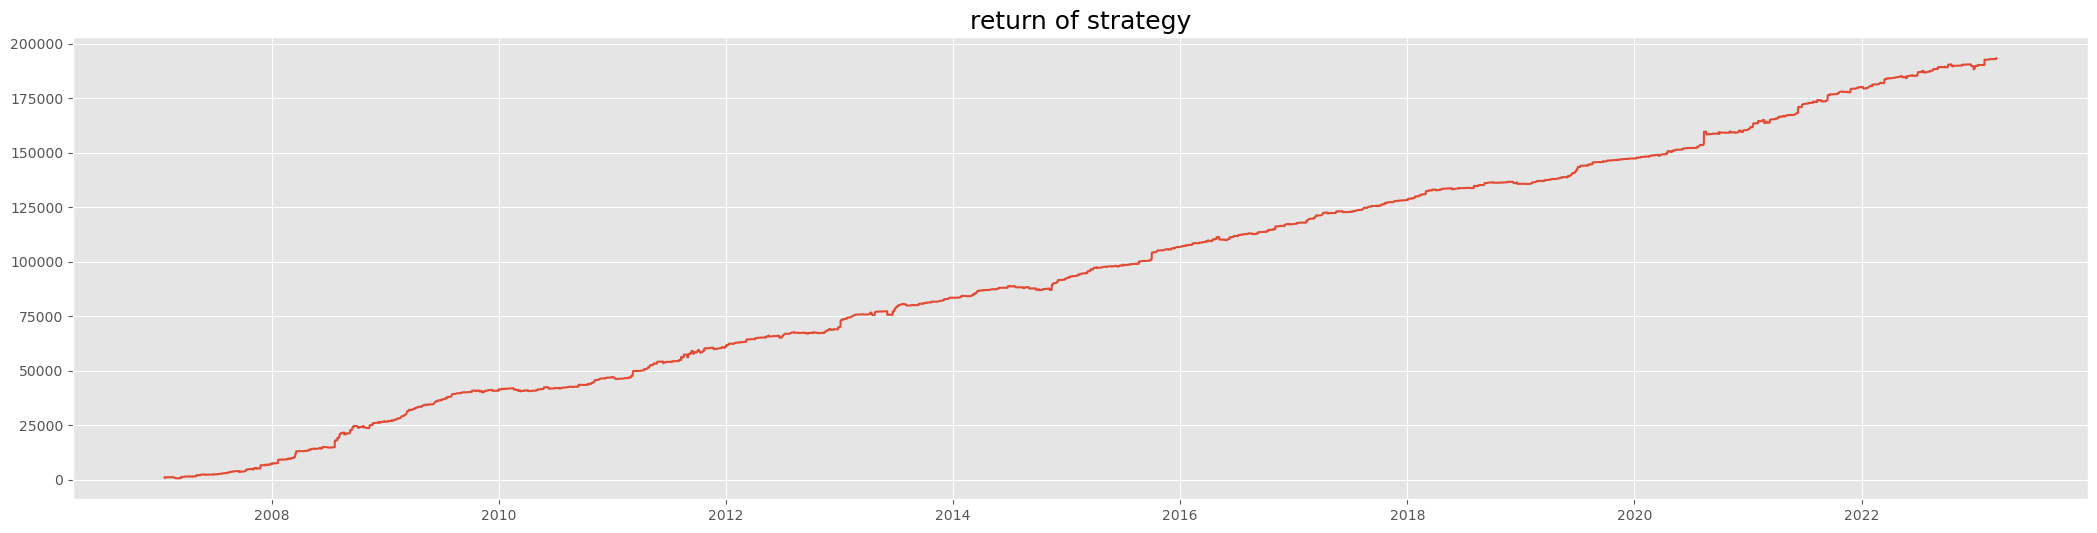

In [28]:
# Strategy performance
print('***** STRATEGY PERFORMANCE *****')
print('--------------------------------')
print('CAGR:', CAGR(strategy_results, df[0], account_size), '%')
print('Sharpe ratio:', sharpe_ratio(strategy_results))
print('Maximum drawdown', max_drawdown(strategy_results), '% \n')
print('Number of trades:', len(str_profits + str_losses + str_be))
print('Number of profits:', len(str_profits))
print('Number of losses:', len(str_losses))
print('Number of breakevens:', len(str_be), '\n')
print('Winning percentage', (round(len(str_profits) /
      (len(str_profits) + len(str_losses)) * 100, 2)), '%')
print('ROI:', round(strategy_results['cum_res'][-1]) - account_size)
print('--------------------------------')
print('Average profitable trade:', round(
    sum(str_profits) / len(str_profits), 2))
print('Average lossing trade:', round(sum(str_losses) / len(str_losses), 2))
print('Max profitable trade:', round(max(str_profits), 2))
print('Max lossing trade:', round(min(str_losses), 2))

plt.figure(figsize=(26, 6))
plt.plot(strategy_results['cum_res'])
plt.title('return of strategy', fontsize=18)

EURUSD/EURUSD_H4 - EURUSD_H4 - PERFORMANCE
--------------------------------
Number of trades: 865
Number of profits: 587
Number of losses: 273
Number of breakevens: 5 

Winning percentage 68.26 %
ROI: 7105.1
--------------------------------
Average profitable trade: 18.04
Average lossing trade: -12.76
Max profitable trade: 185.5
Max lossing trade: -142.1
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx 

Number of trades per day 
 day_of_trade
Fri    162
Mon    169
Sun     31
Thu    179
Tue    141
Wed    183
Name: result, dtype: int64


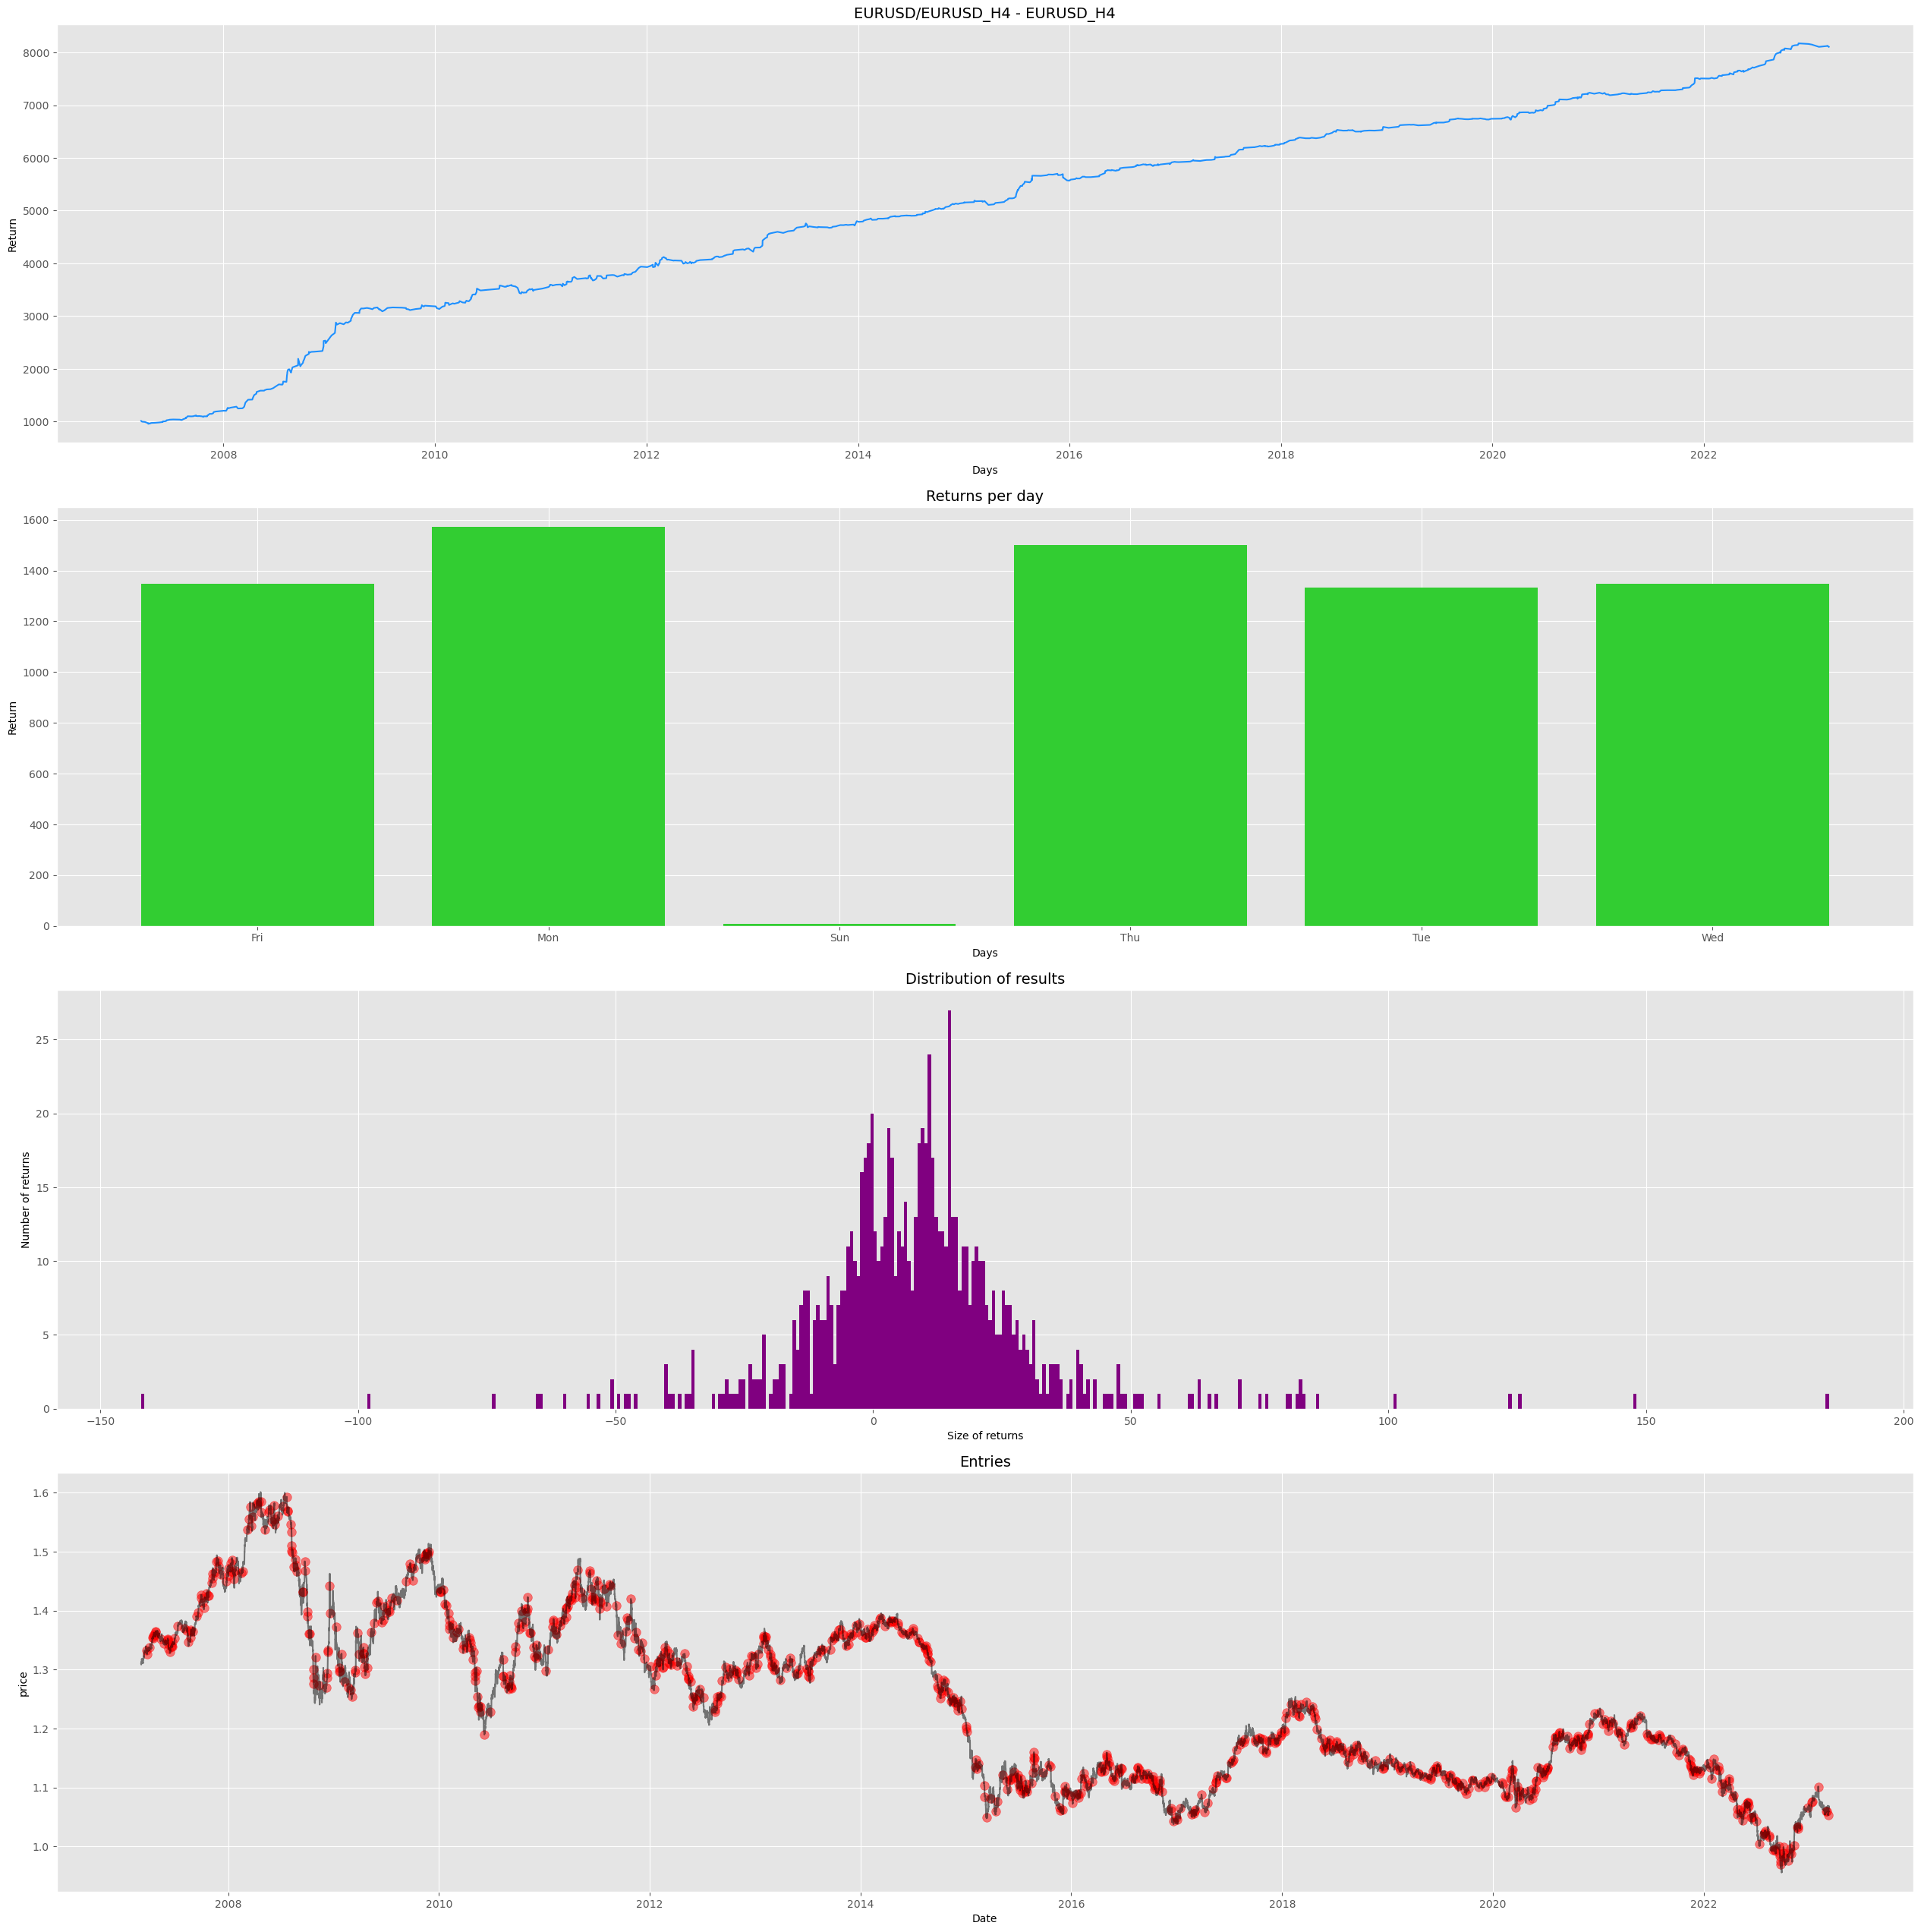

AUDUSD/AUDUSD_H4 - AUDUSD_H4 - PERFORMANCE
--------------------------------
Number of trades: 853
Number of profits: 605
Number of losses: 241
Number of breakevens: 7 

Winning percentage 71.51 %
ROI: 6473.46
--------------------------------
Average profitable trade: 16.39
Average lossing trade: -14.27
Max profitable trade: 101.7
Max lossing trade: -236.3
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx 

Number of trades per day 
 day_of_trade
Fri    161
Mon    185
Sun     29
Thu    162
Tue    162
Wed    154
Name: result, dtype: int64


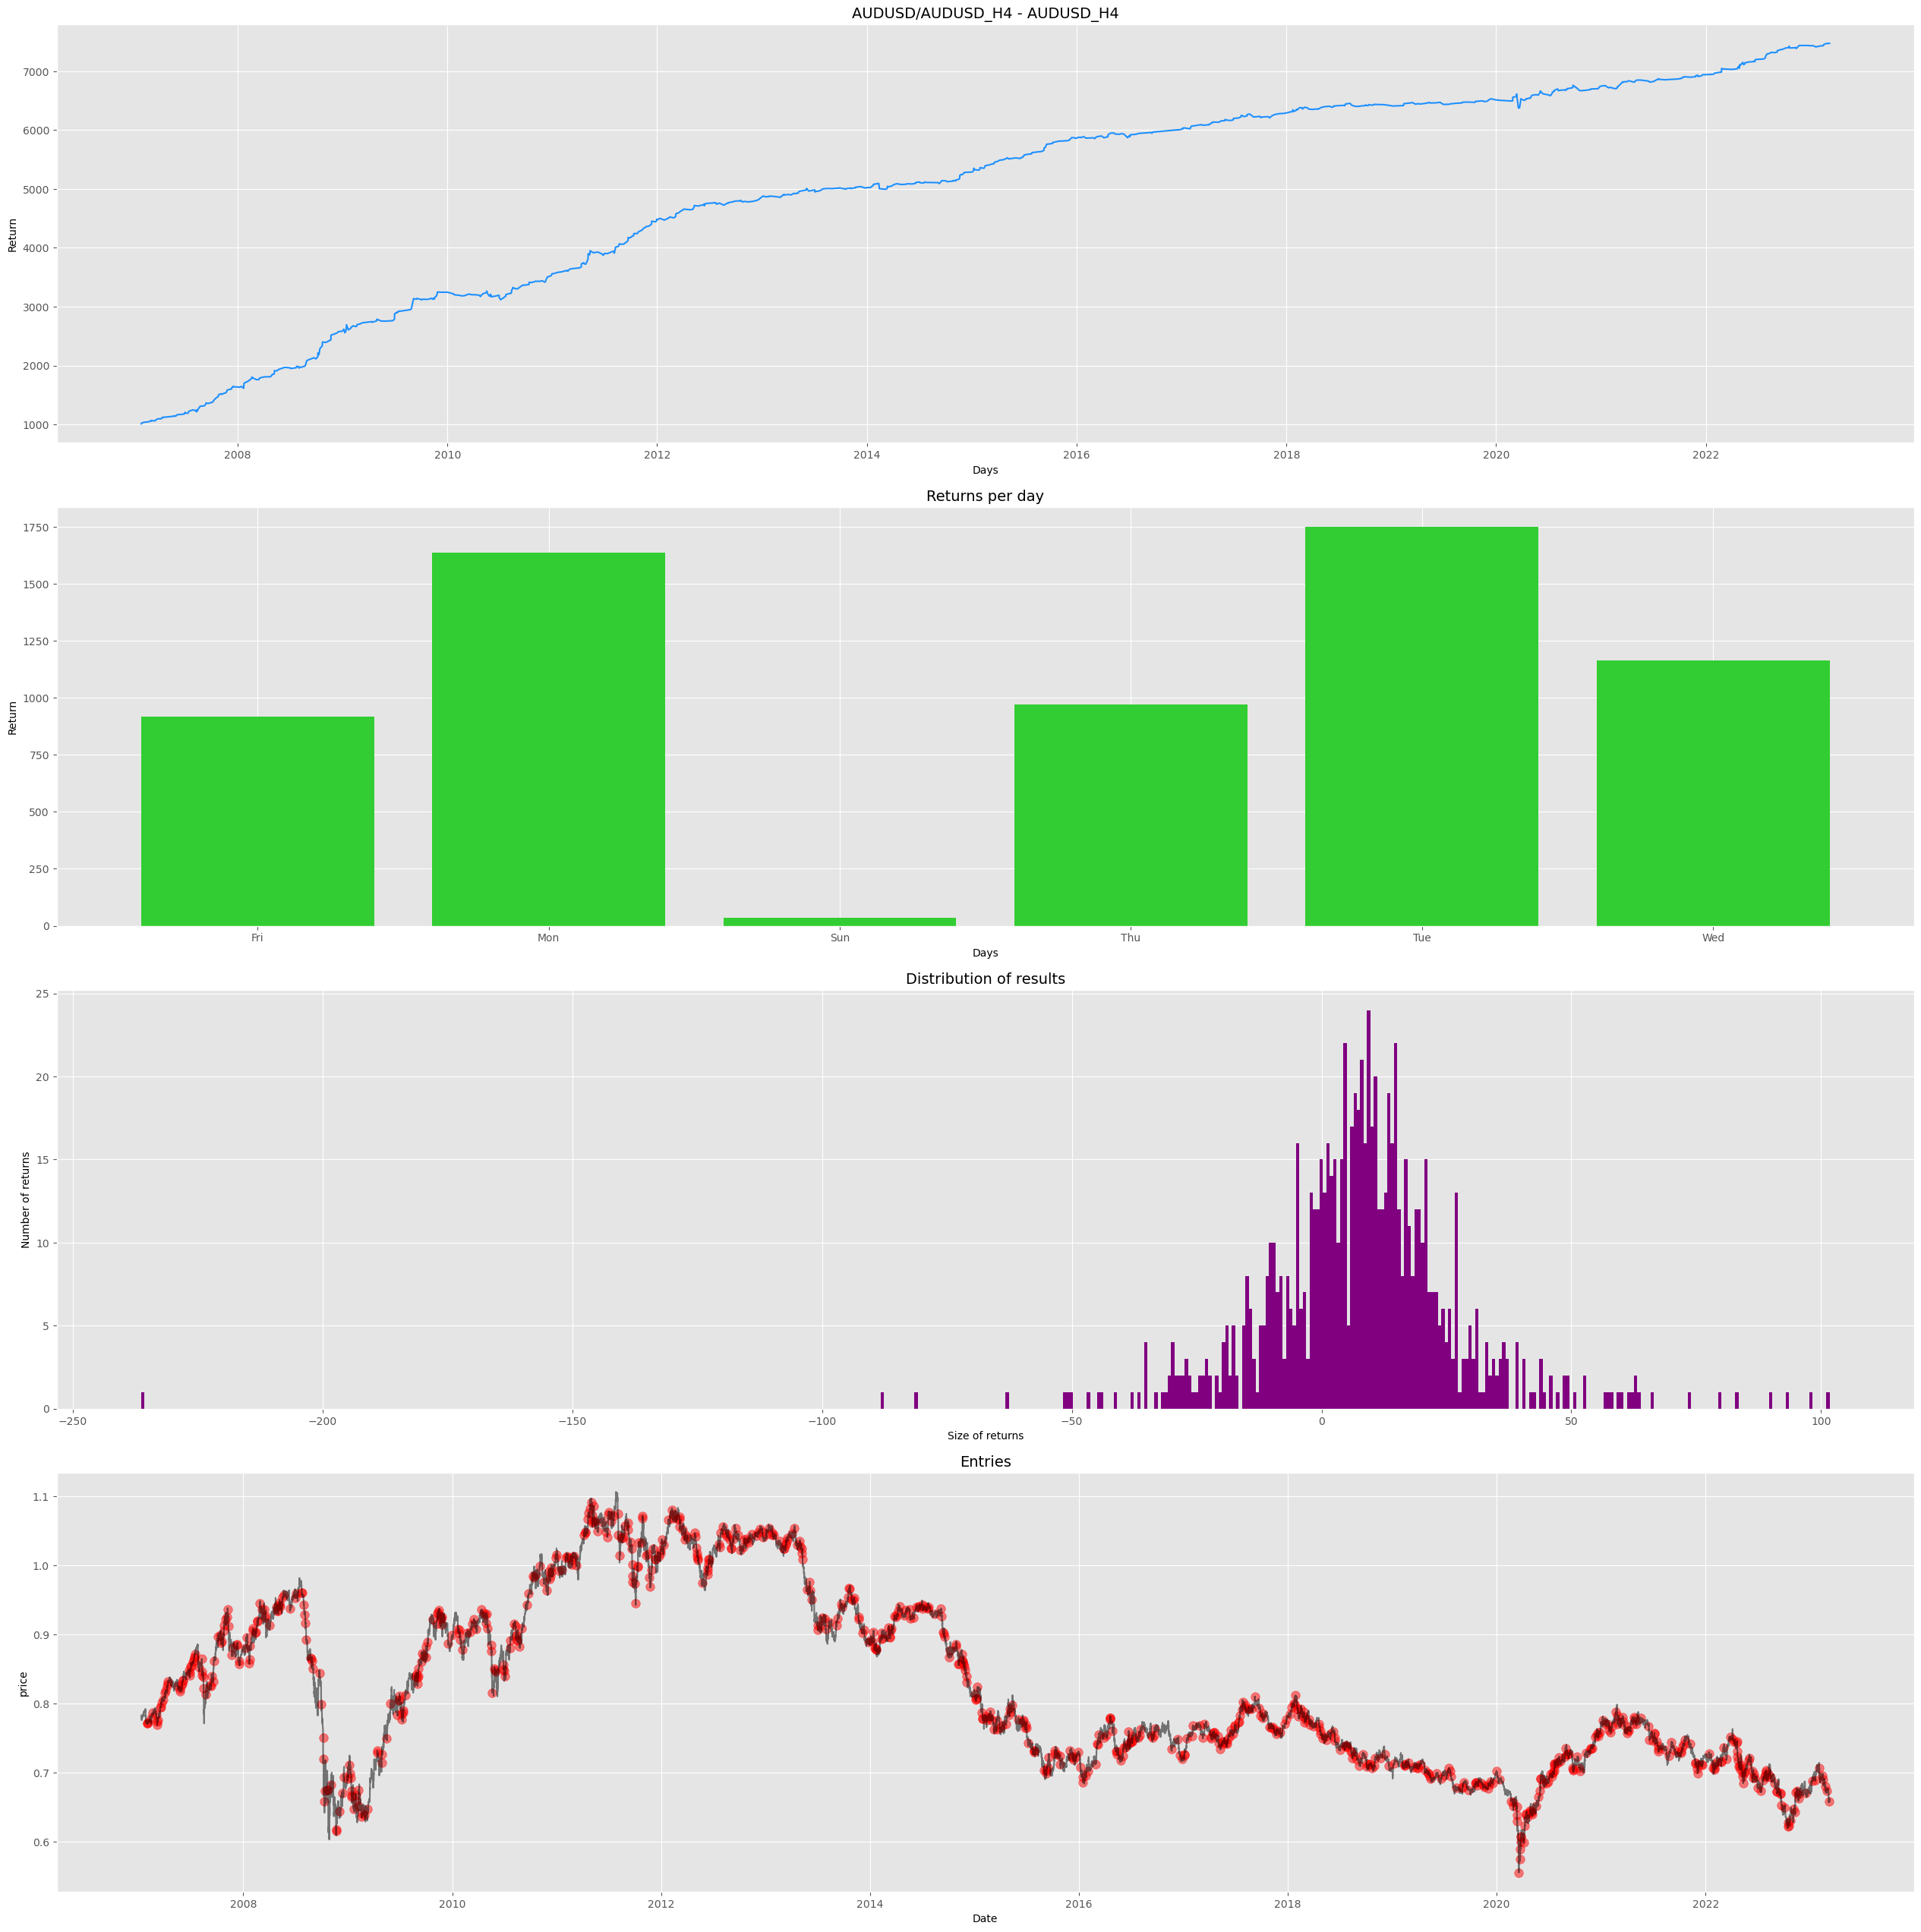

GBPUSD/GBPUSD_H4 - GBPUSD_H4 - PERFORMANCE
--------------------------------
Number of trades: 755
Number of profits: 523
Number of losses: 225
Number of breakevens: 7 

Winning percentage 69.92 %
ROI: 7604.77
--------------------------------
Average profitable trade: 22.81
Average lossing trade: -19.23
Max profitable trade: 215.5
Max lossing trade: -296.8
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx 

Number of trades per day 
 day_of_trade
Fri    149
Mon    162
Sun     24
Thu    139
Tue    136
Wed    145
Name: result, dtype: int64


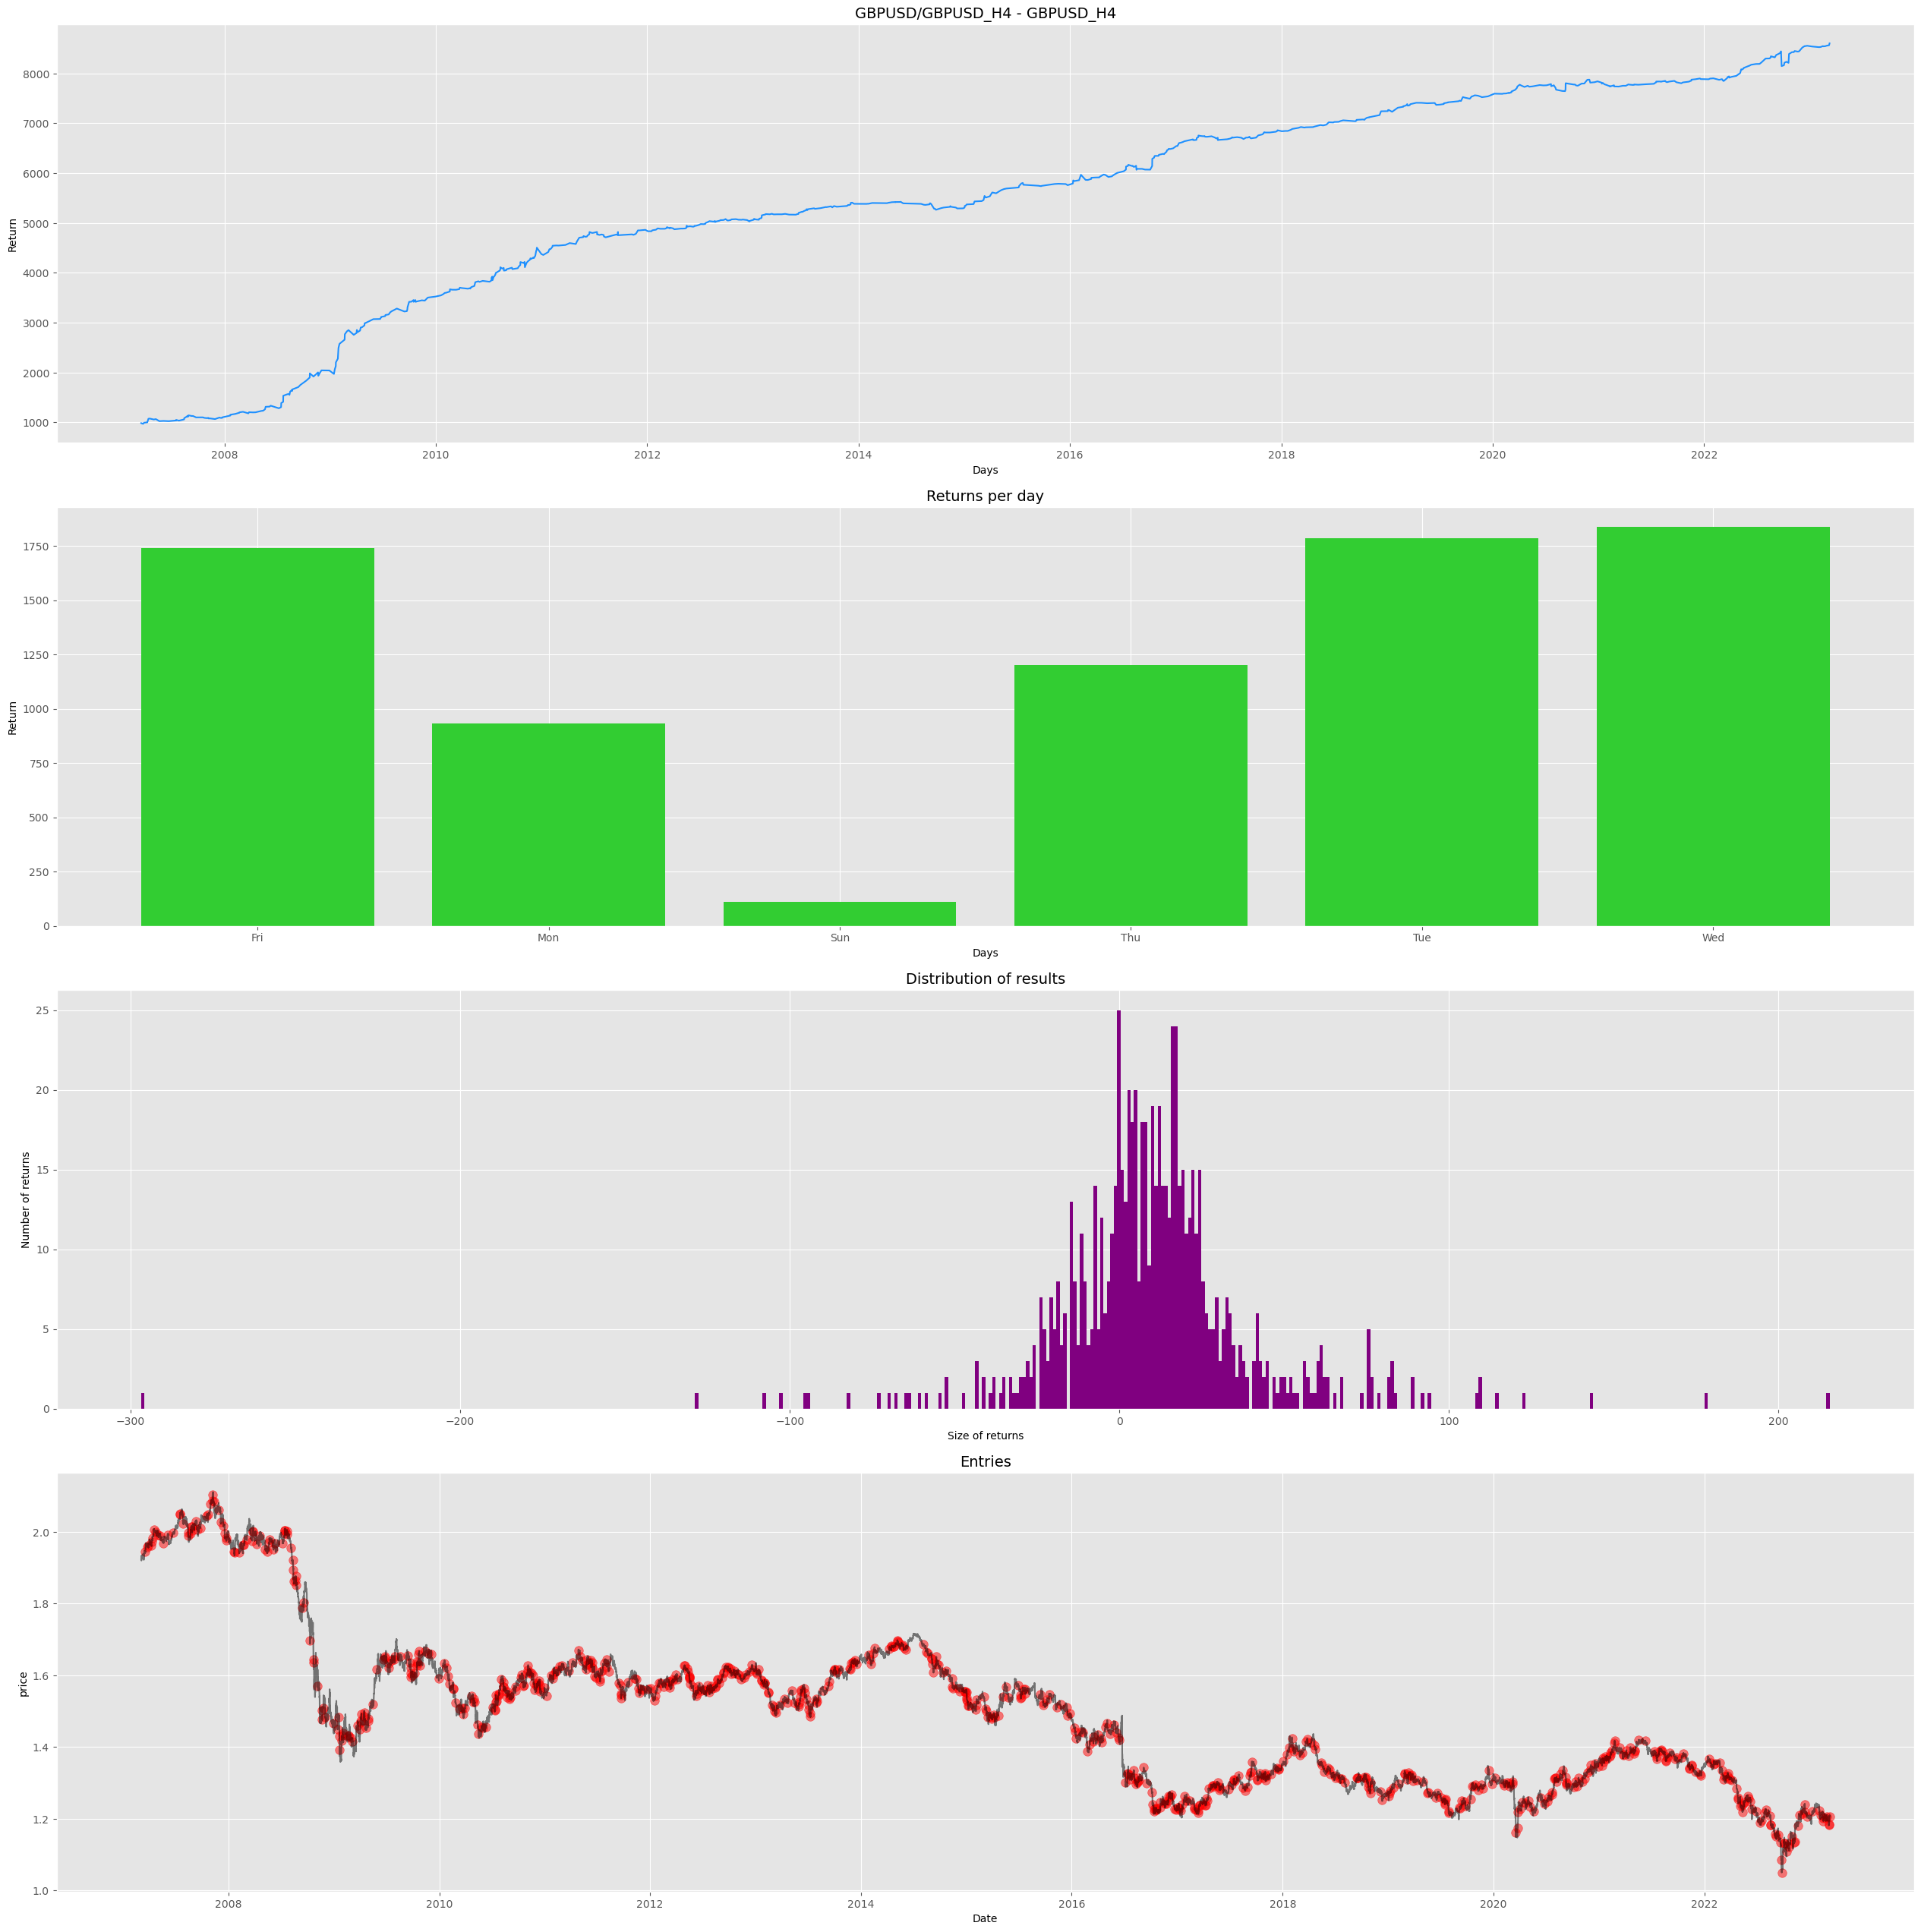

NZDUSD/NZDUSD_H4 - NZDUSD_H4 - PERFORMANCE
--------------------------------
Number of trades: 838
Number of profits: 579
Number of losses: 253
Number of breakevens: 6 

Winning percentage 69.59 %
ROI: 5269.39
--------------------------------
Average profitable trade: 15.05
Average lossing trade: -13.61
Max profitable trade: 95.1
Max lossing trade: -185.4
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx 

Number of trades per day 
 day_of_trade
Fri    171
Mon    162
Sun     21
Thu    173
Tue    148
Wed    163
Name: result, dtype: int64


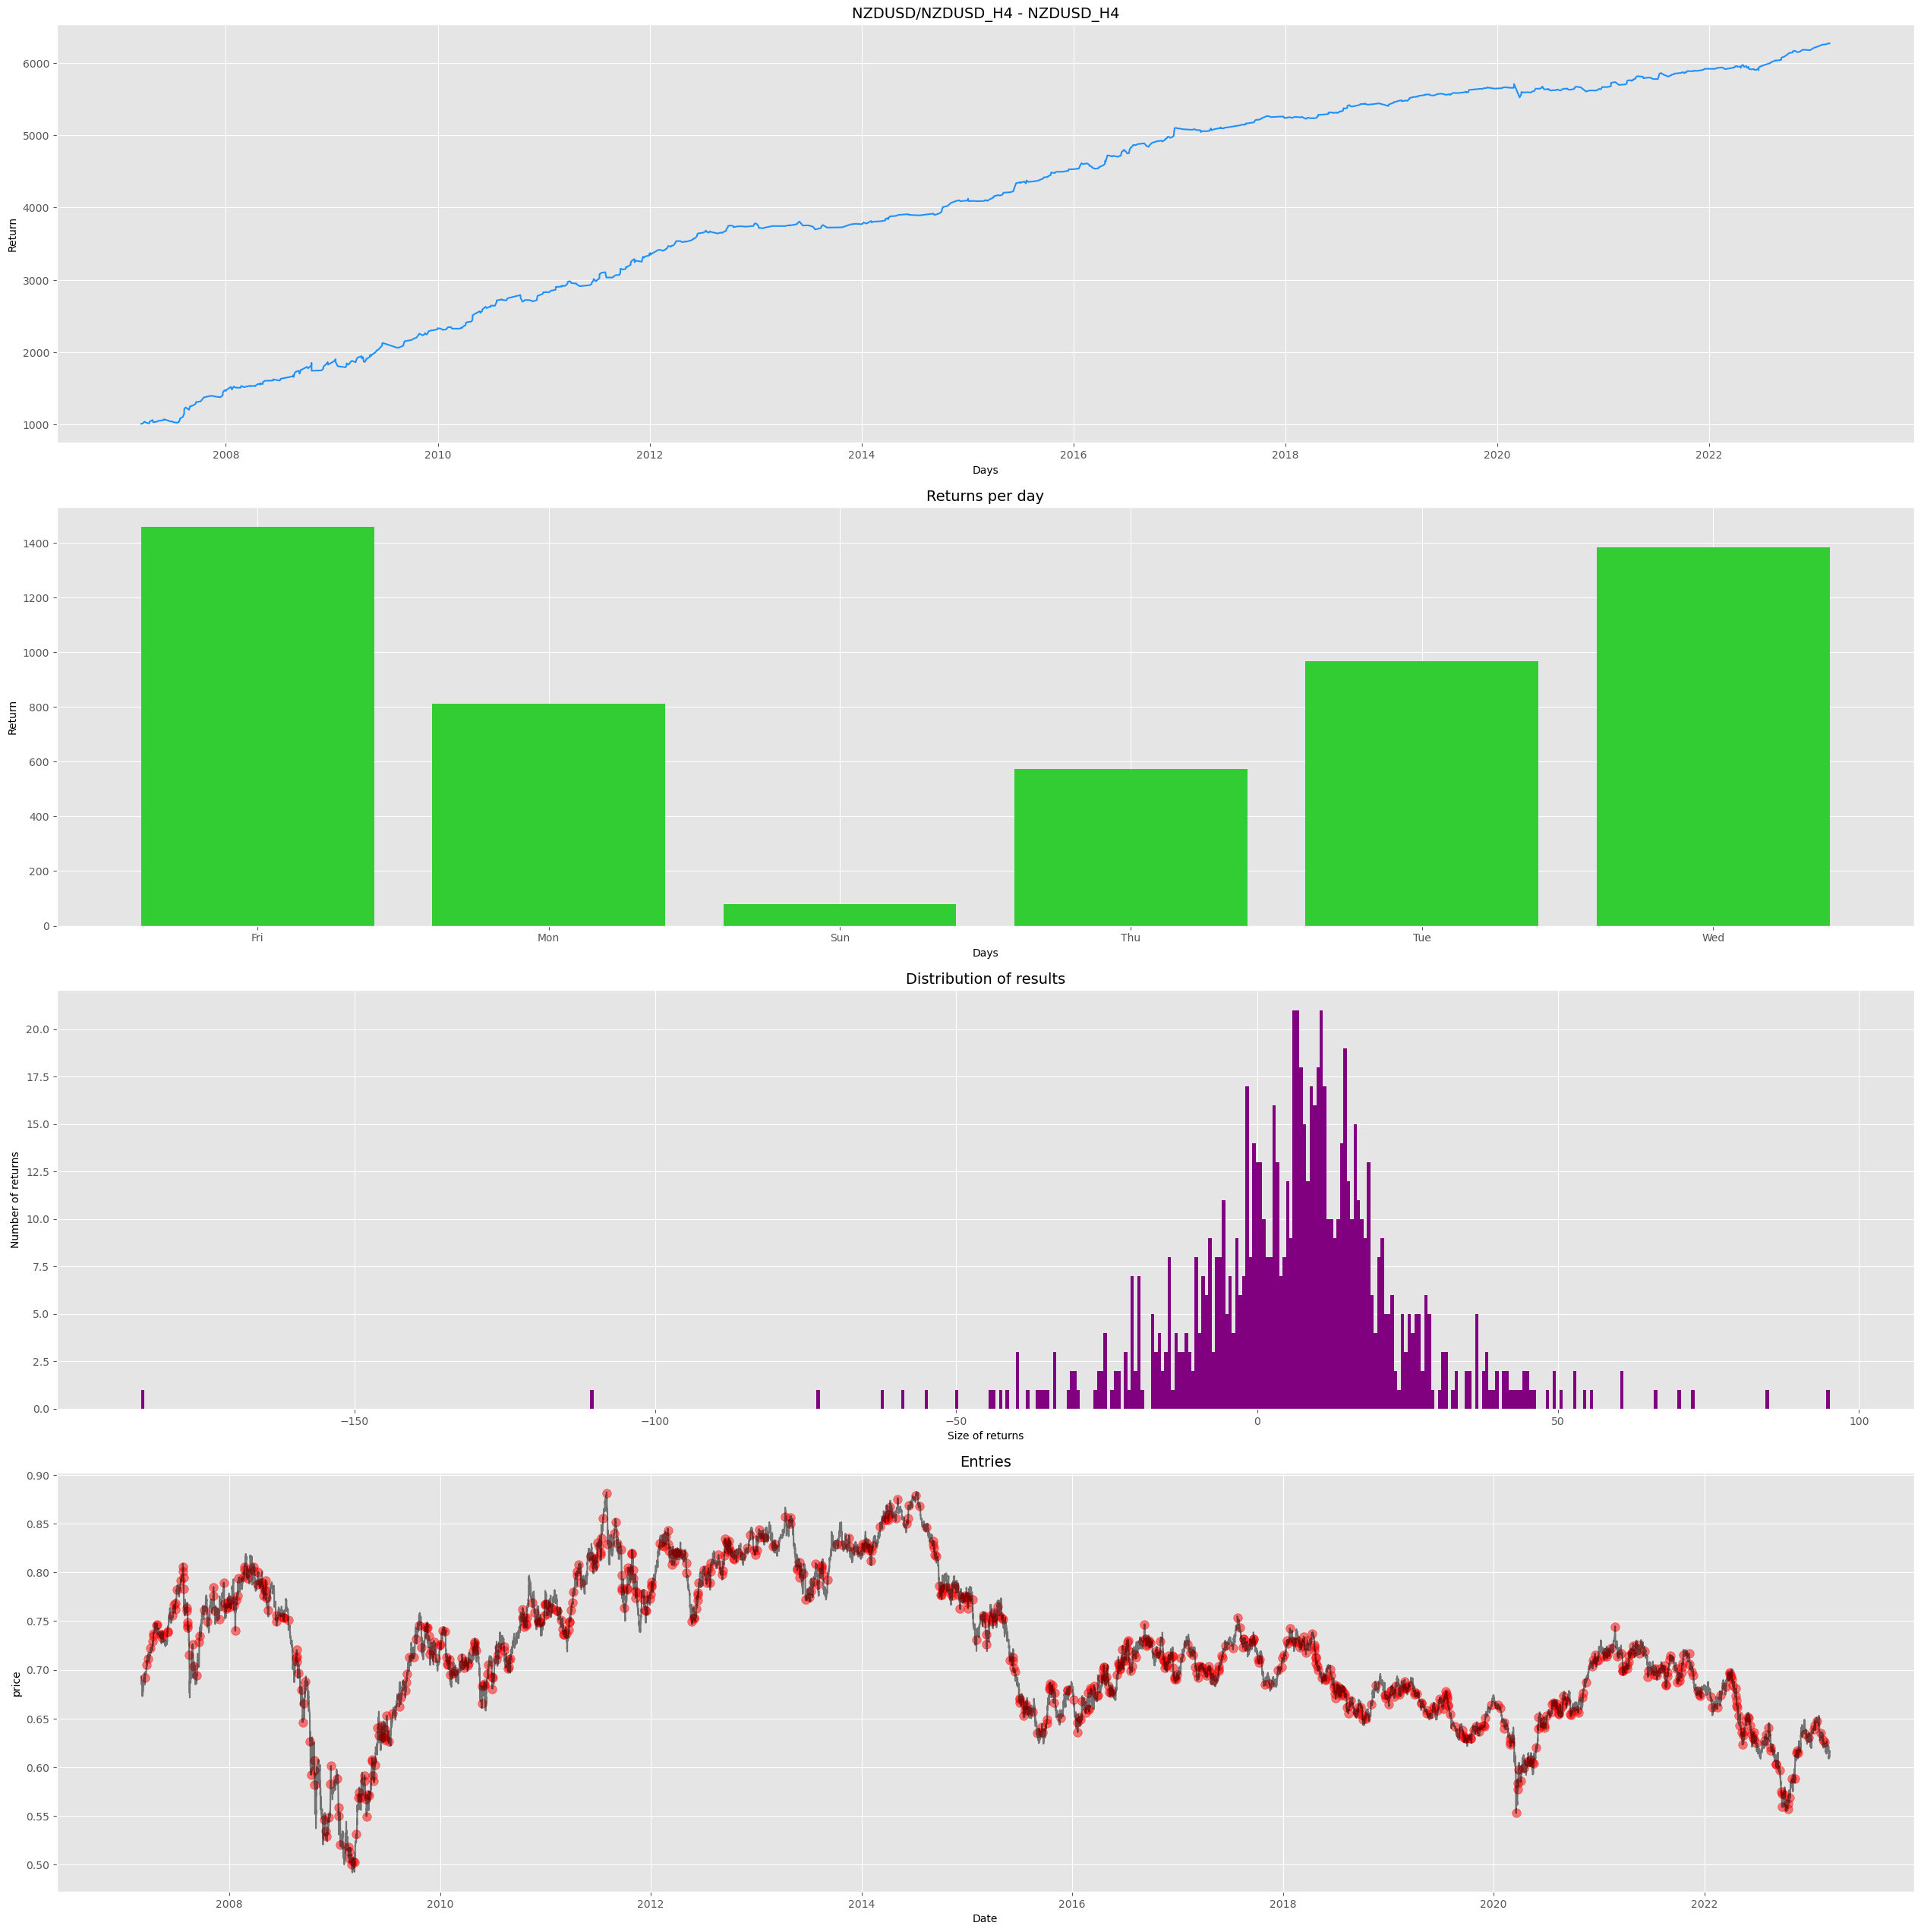

USDCAD/USDCAD_H4 - USDCAD_H4 - PERFORMANCE
--------------------------------
Number of trades: 809
Number of profits: 557
Number of losses: 249
Number of breakevens: 3 

Winning percentage 69.11 %
ROI: 5903.58
--------------------------------
Average profitable trade: 18.21
Average lossing trade: -17.02
Max profitable trade: 177.0
Max lossing trade: -217.5
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx 

Number of trades per day 
 day_of_trade
Fri    144
Mon    162
Sun     29
Thu    174
Tue    148
Wed    152
Name: result, dtype: int64


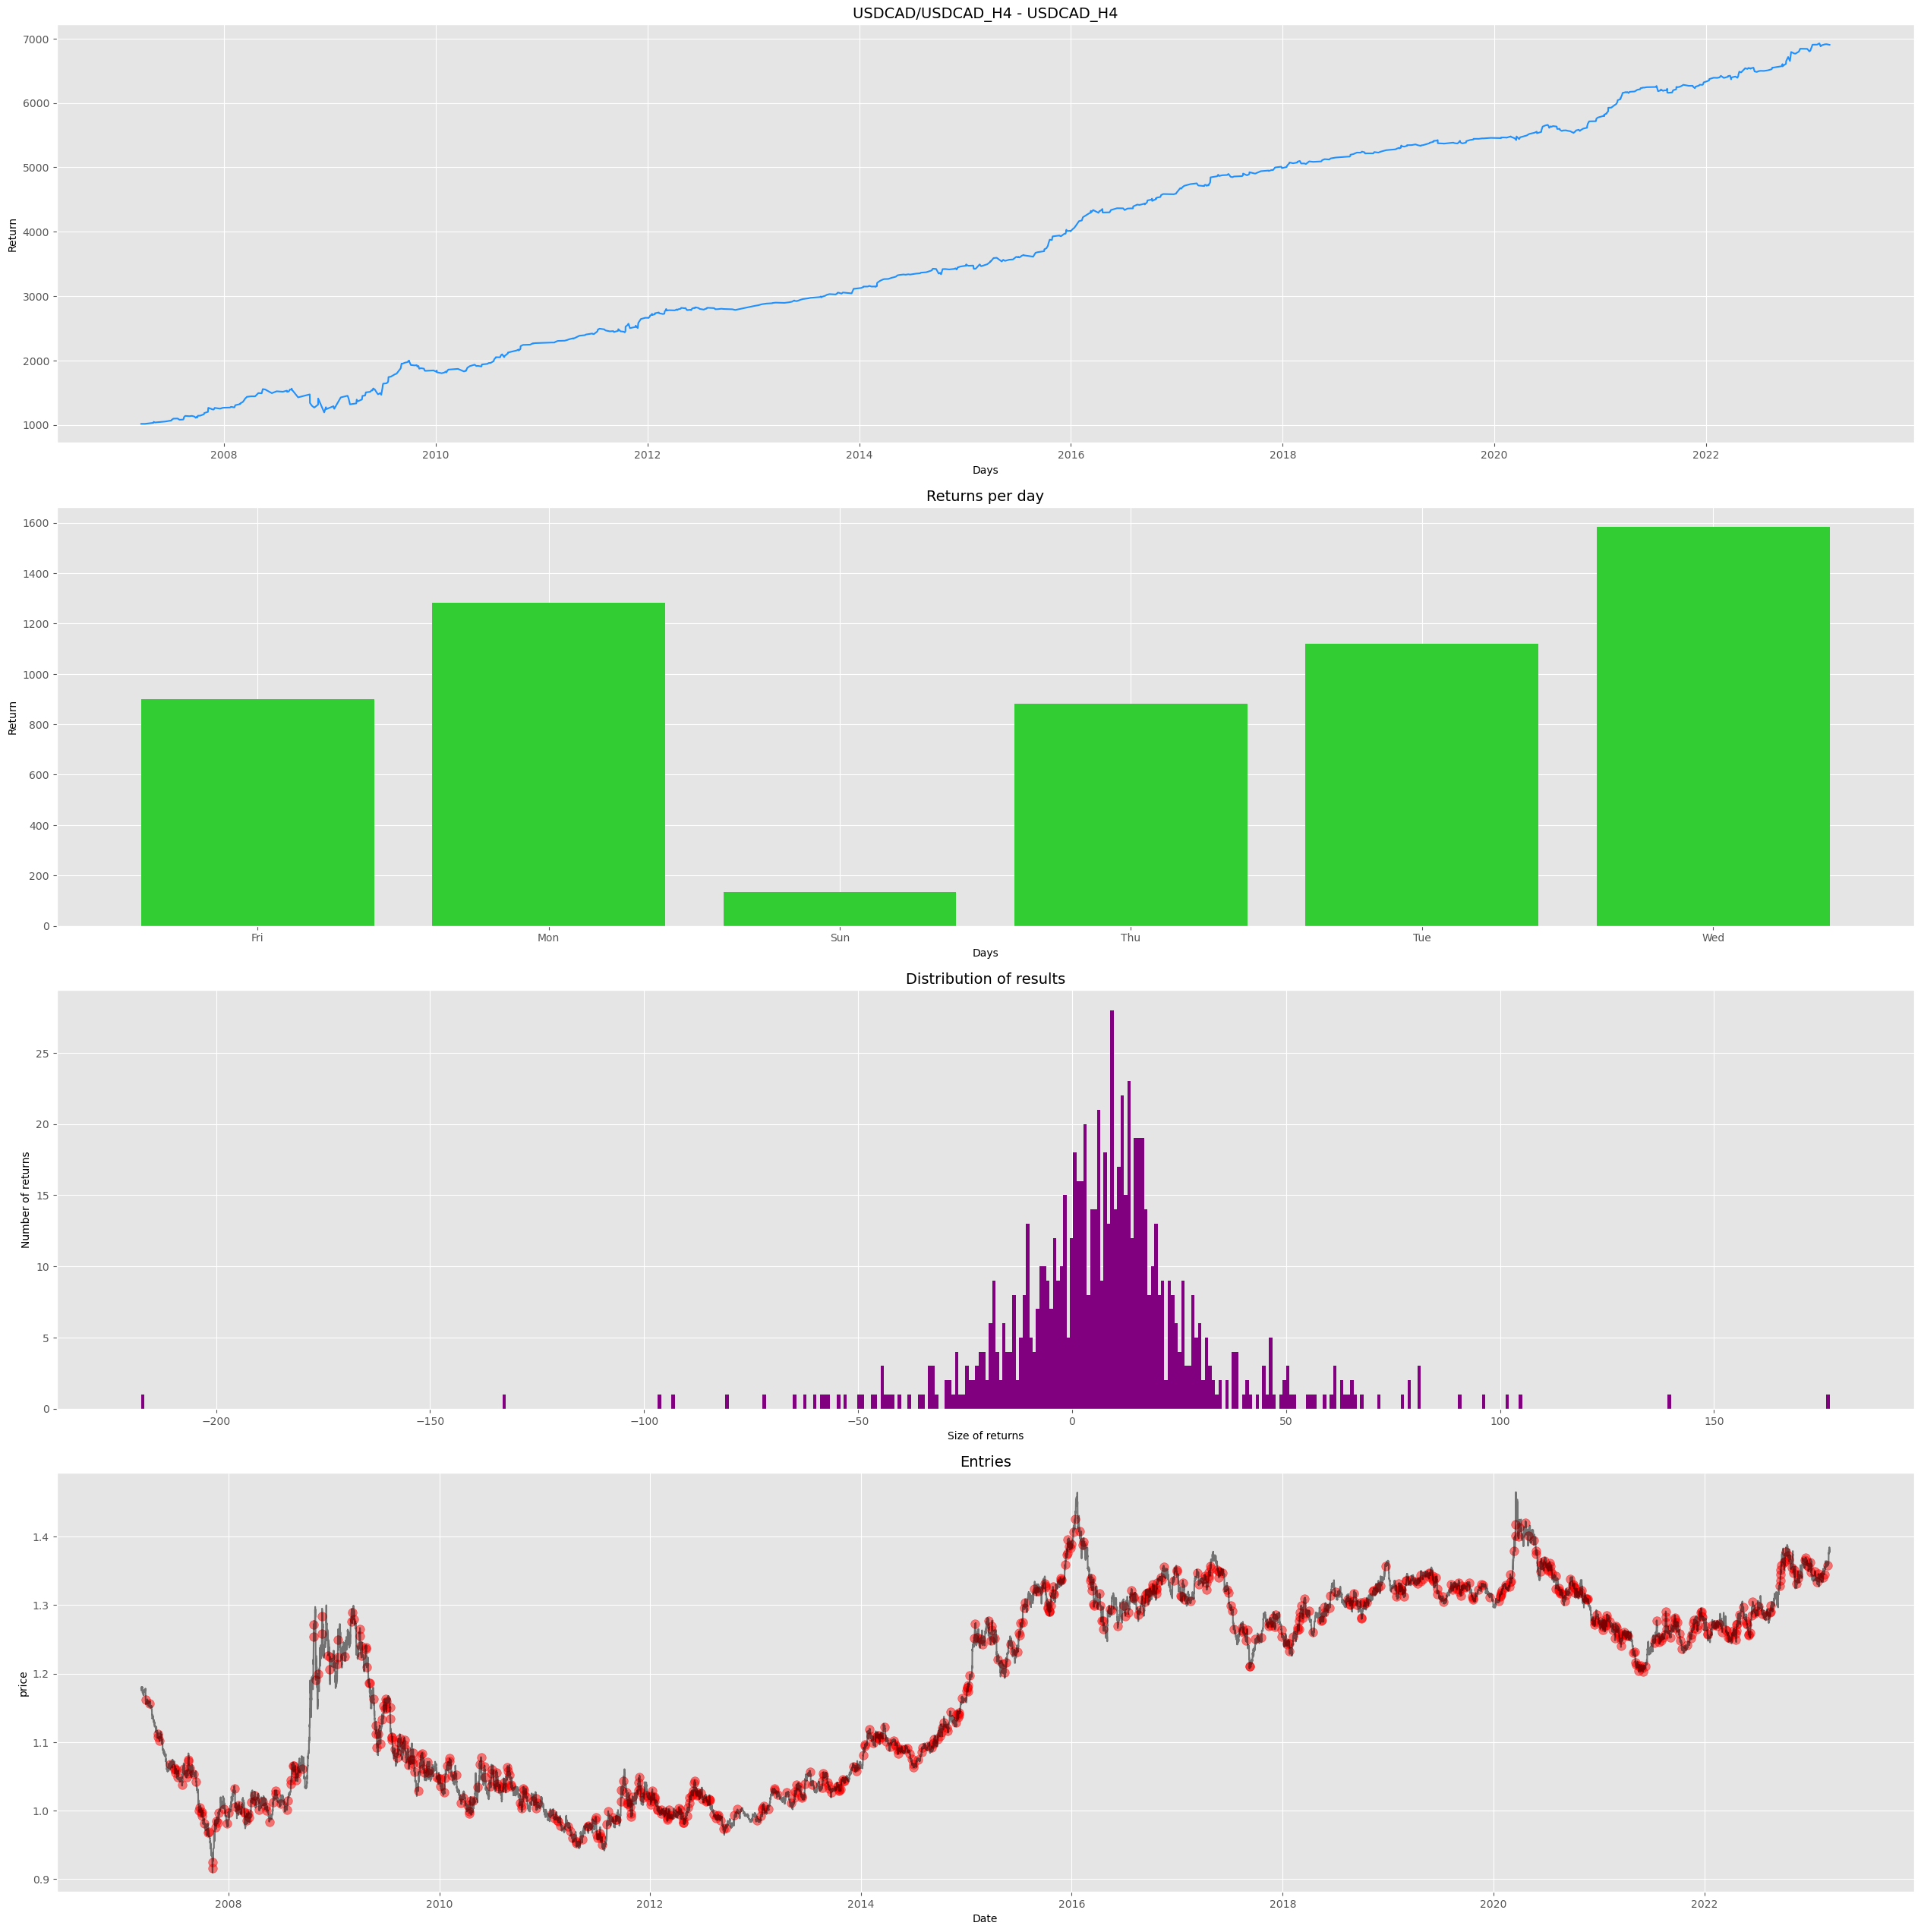

USDCHF/USDCHF_H4 - USDCHF_H4 - PERFORMANCE
--------------------------------
Number of trades: 822
Number of profits: 538
Number of losses: 274
Number of breakevens: 10 

Winning percentage 66.26 %
ROI: 4280.66
--------------------------------
Average profitable trade: 15.14
Average lossing trade: -14.11
Max profitable trade: 119.5
Max lossing trade: -131.5
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx 

Number of trades per day 
 day_of_trade
Fri    160
Mon    141
Sun     22
Thu    186
Tue    146
Wed    167
Name: result, dtype: int64


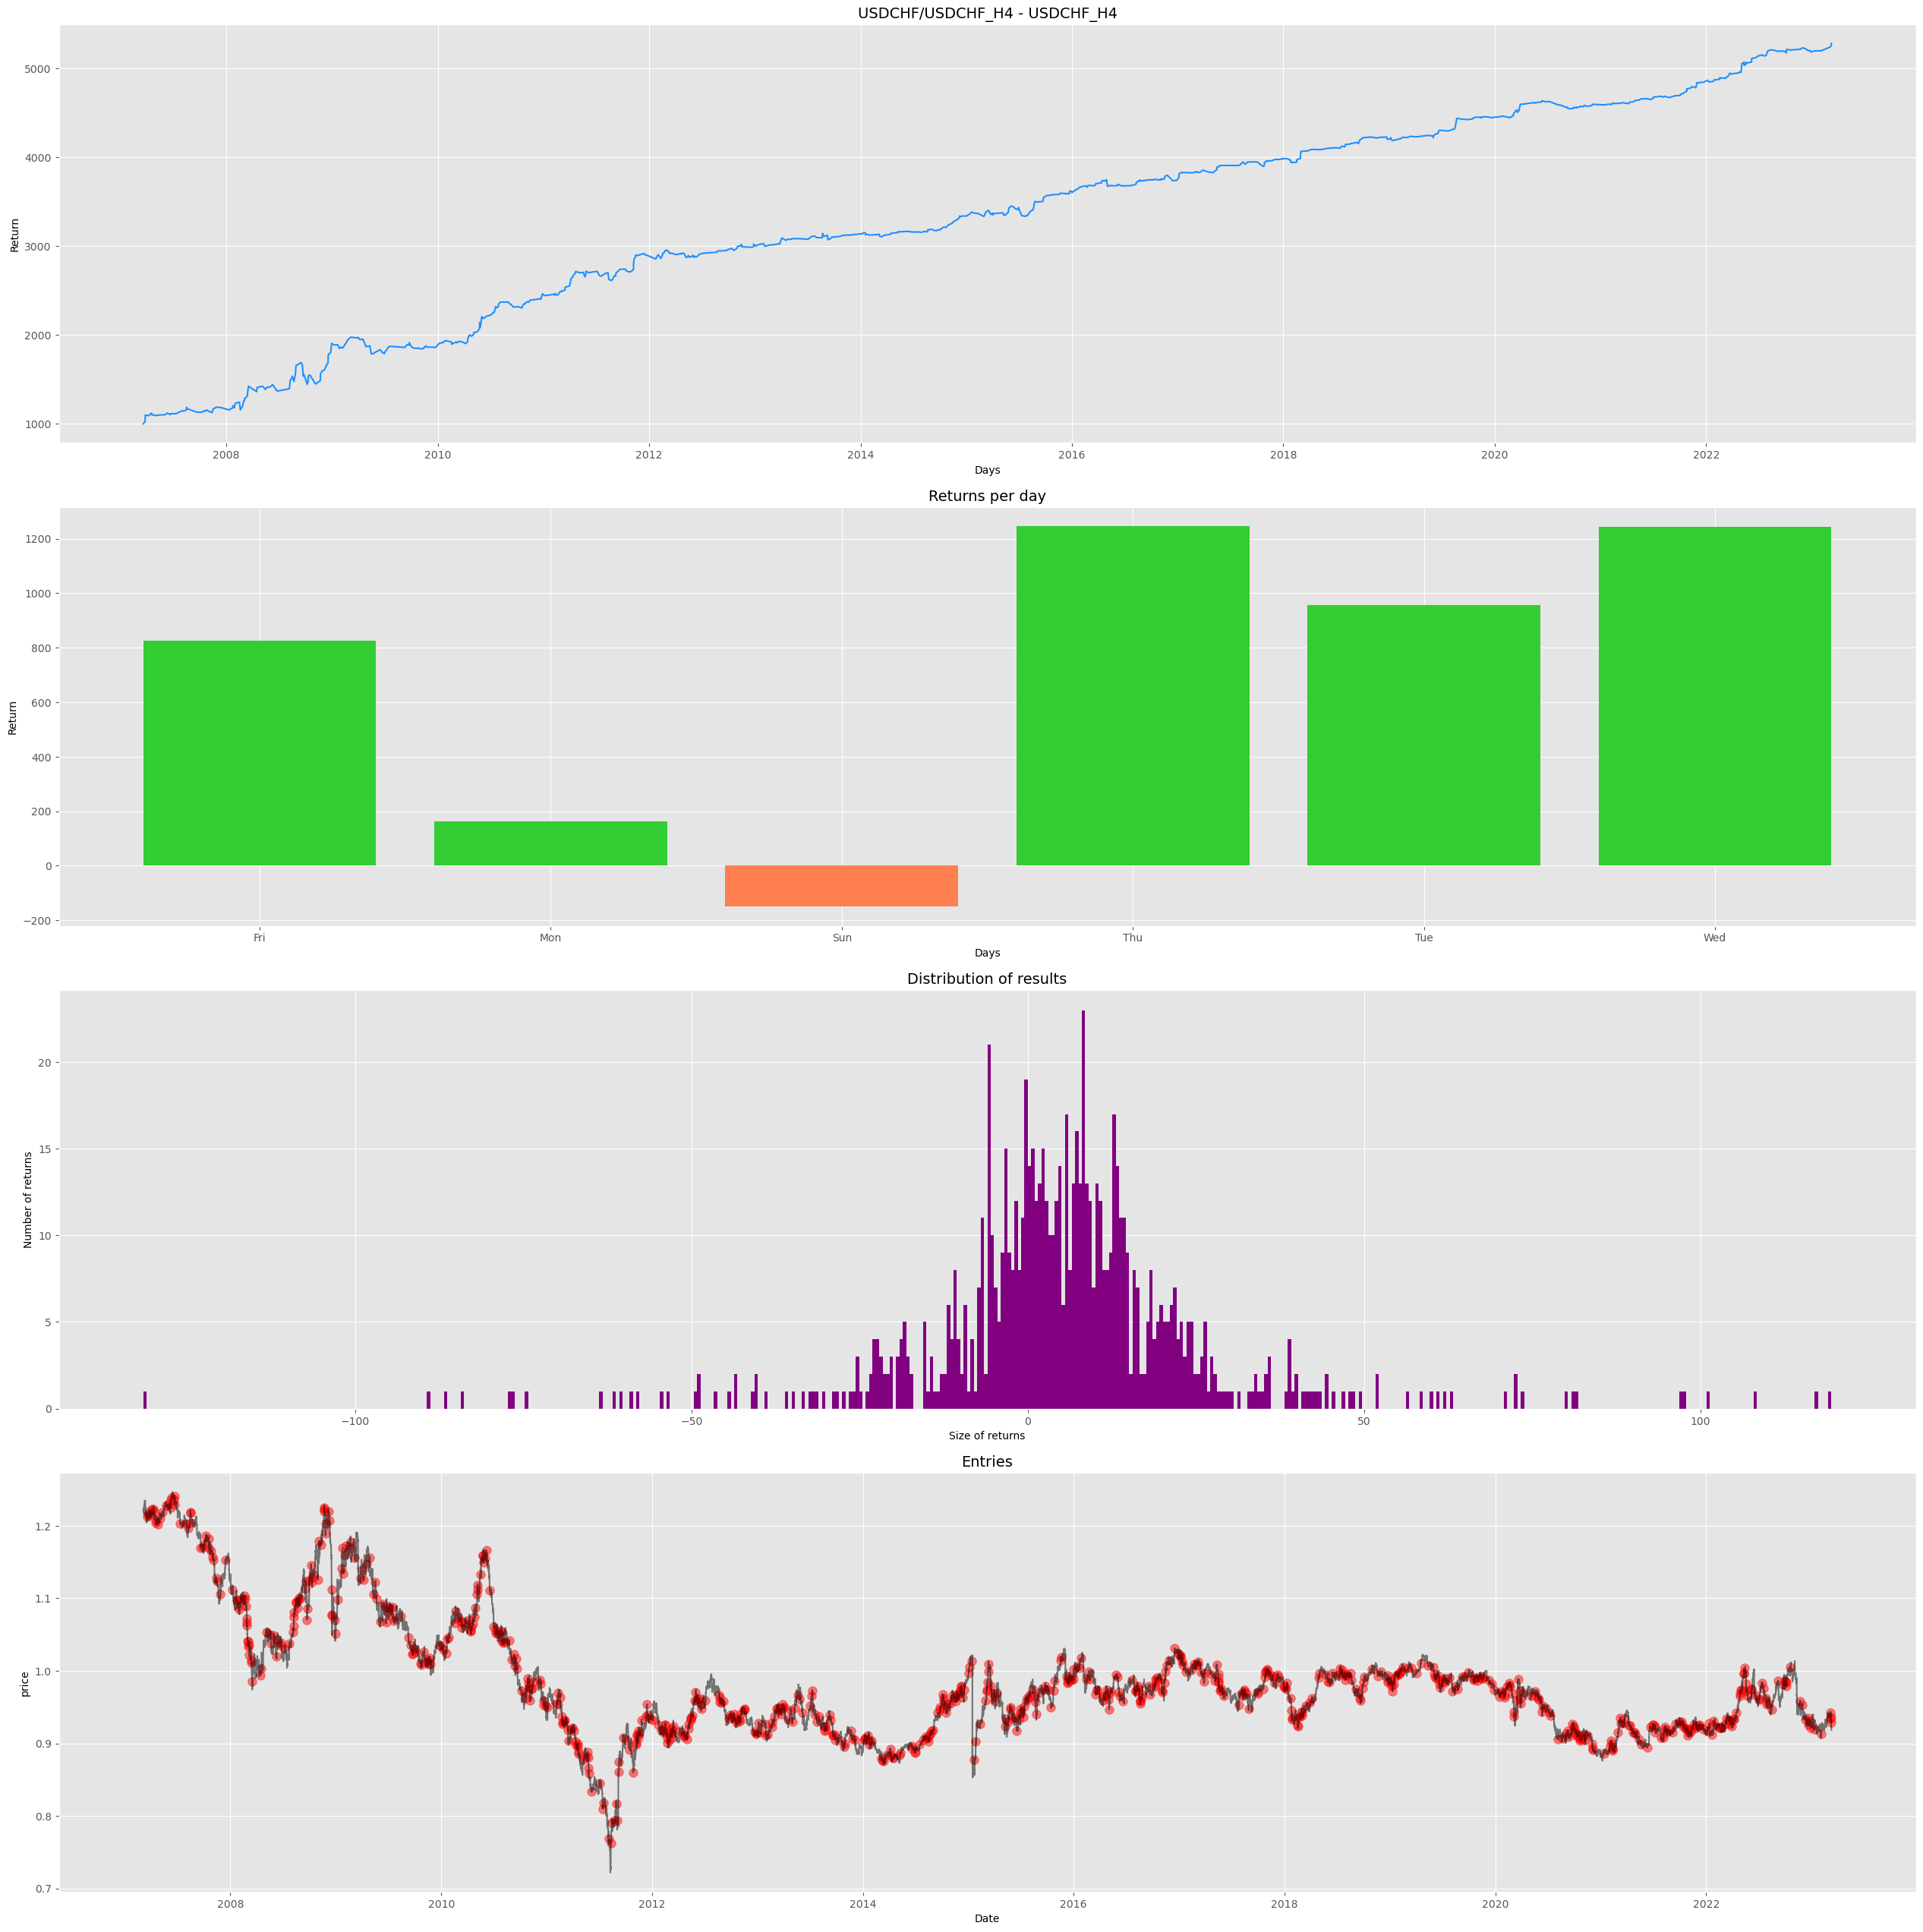

USDJPY/USDJPY_H4 - USDJPY_H4 - PERFORMANCE
--------------------------------
Number of trades: 825
Number of profits: 555
Number of losses: 268
Number of breakevens: 2 

Winning percentage 67.44 %
ROI: 4802.01
--------------------------------
Average profitable trade: 15.64
Average lossing trade: -14.46
Max profitable trade: 95.8
Max lossing trade: -144.3
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx 

Number of trades per day 
 day_of_trade
Fri    168
Mon    152
Sun     24
Thu    162
Tue    168
Wed    151
Name: result, dtype: int64


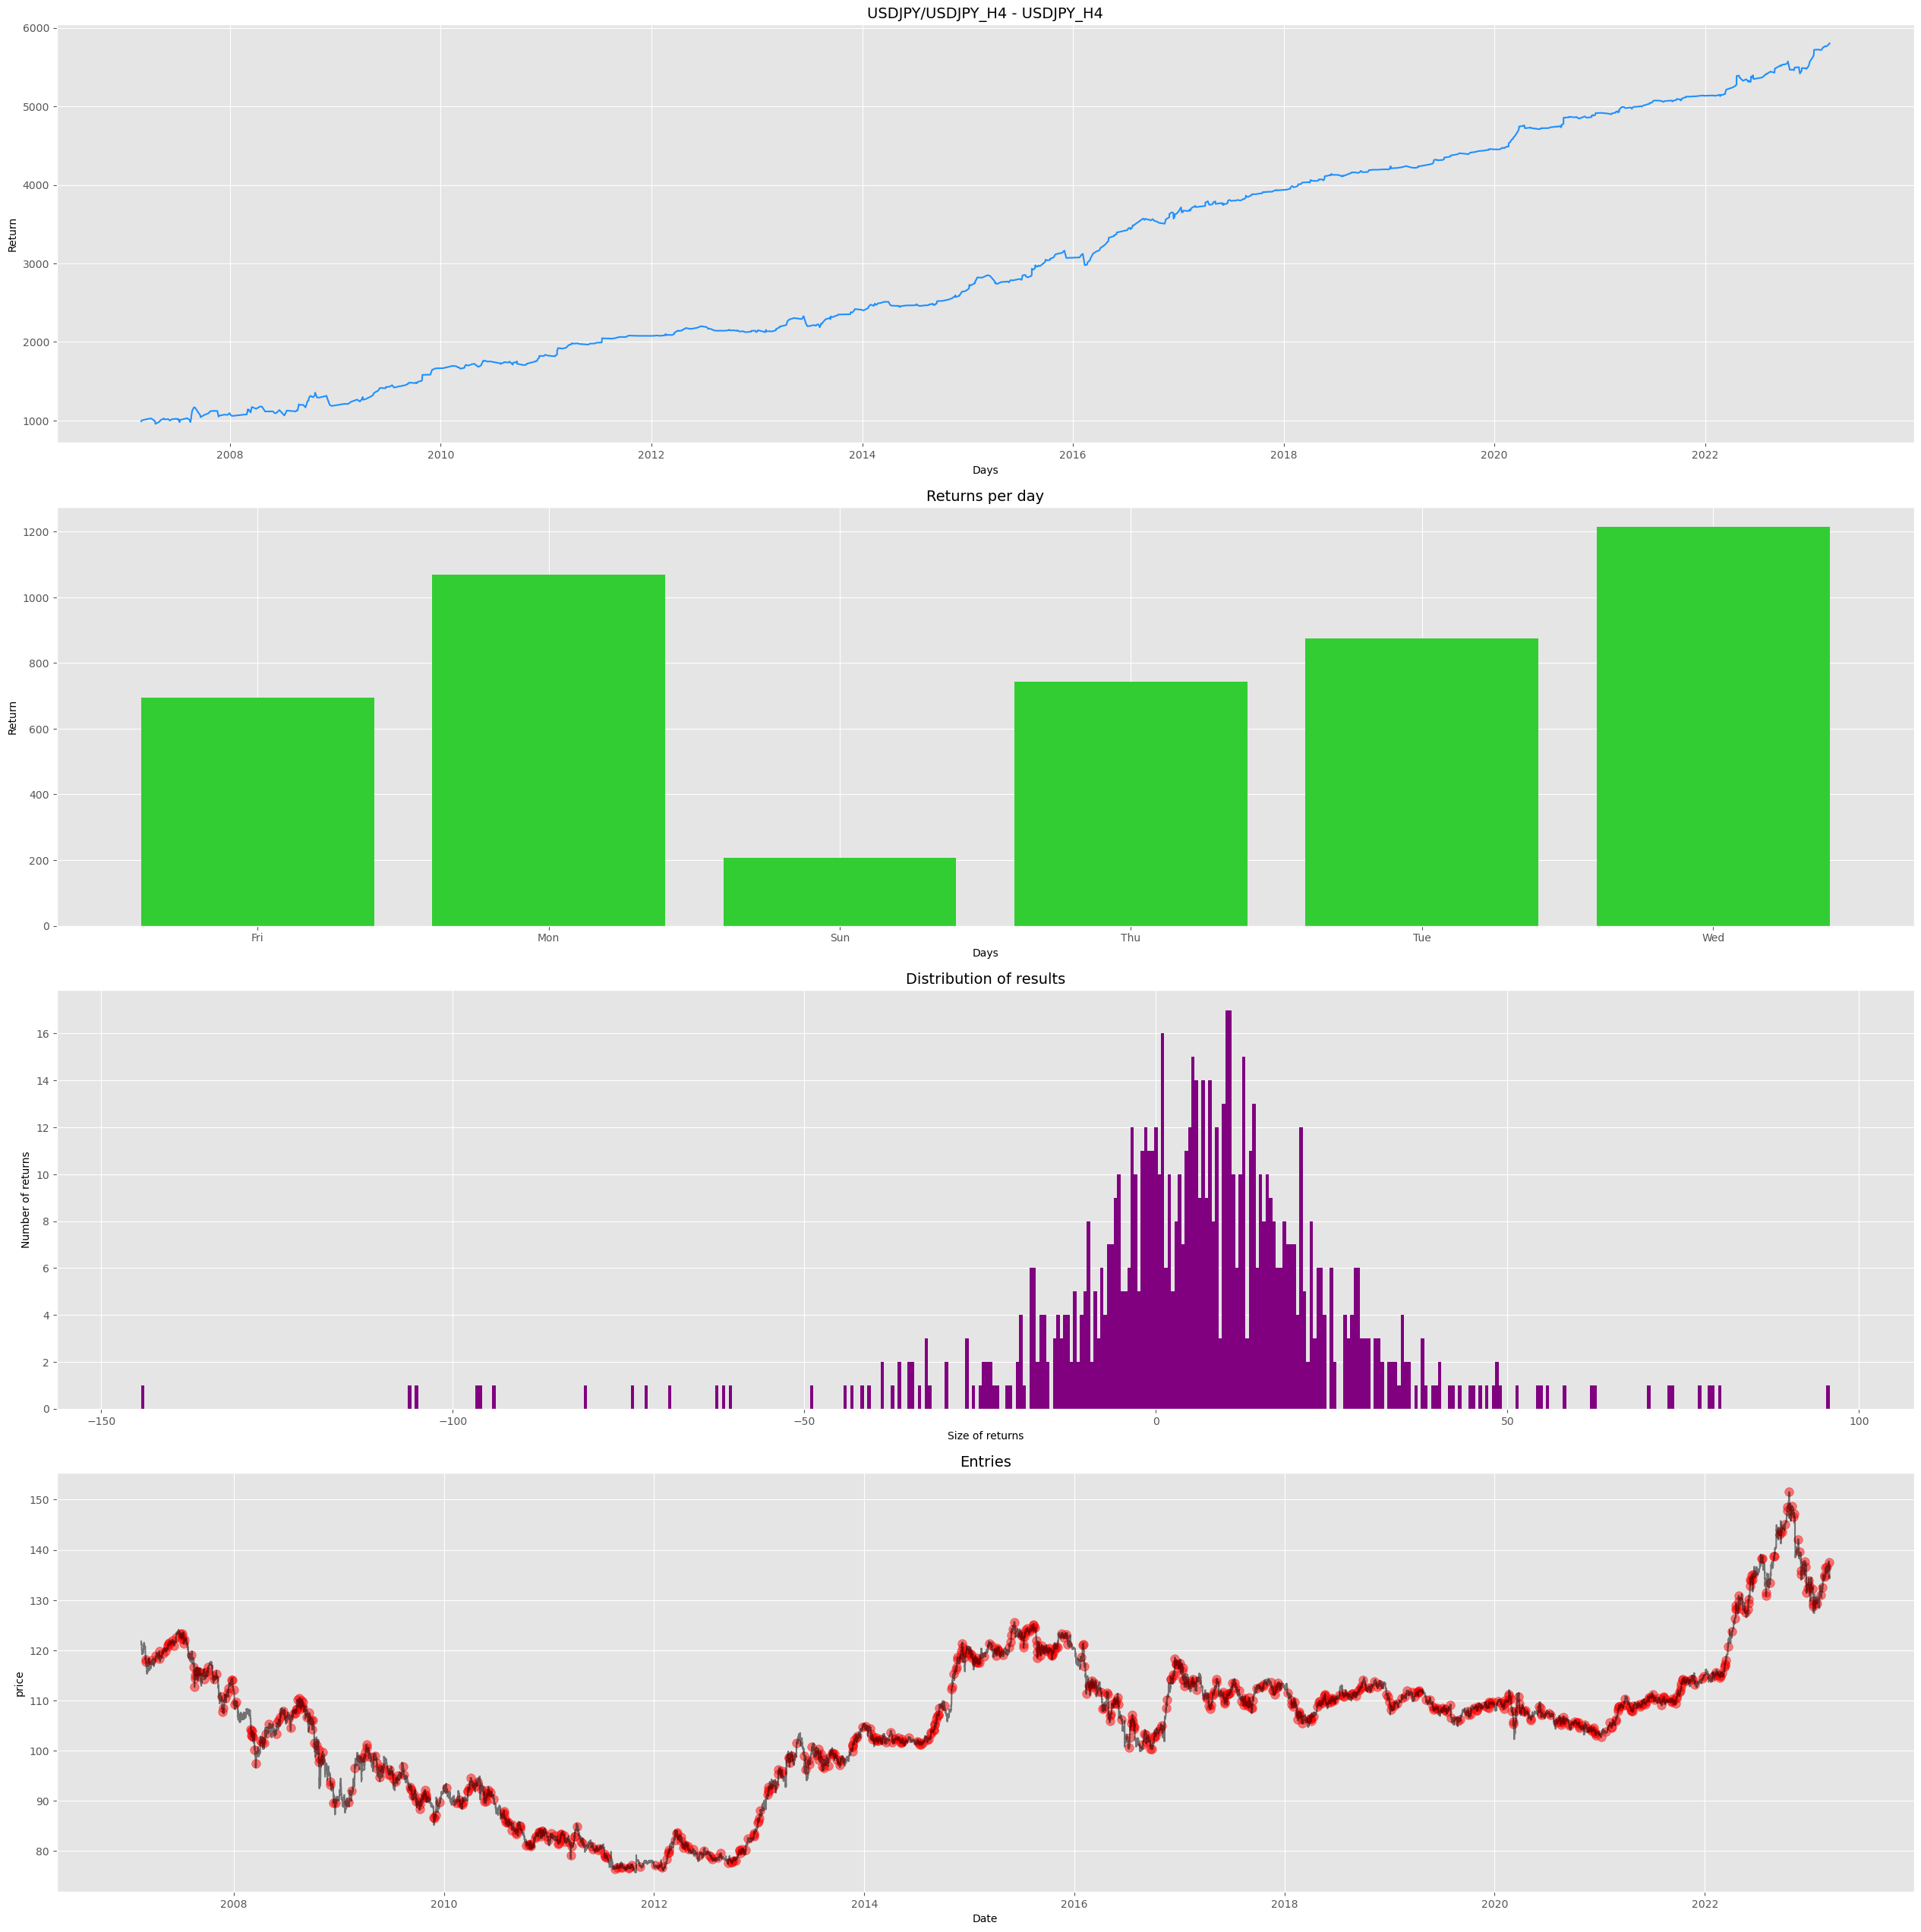

XAUUSD/XAUUSD_H4 - XAUUSD_H4 - PERFORMANCE
--------------------------------
Number of trades: 779
Number of profits: 582
Number of losses: 197
Number of breakevens: 0 

Winning percentage 74.71 %
ROI: 150943.16
--------------------------------
Average profitable trade: 351.73
Average lossing trade: -272.91
Max profitable trade: 5140.0
Max lossing trade: -1672.0
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx 

Number of trades per day 
 day_of_trade
Fri    139
Mon    178
Sun     22
Thu    162
Tue    153
Wed    125
Name: result, dtype: int64


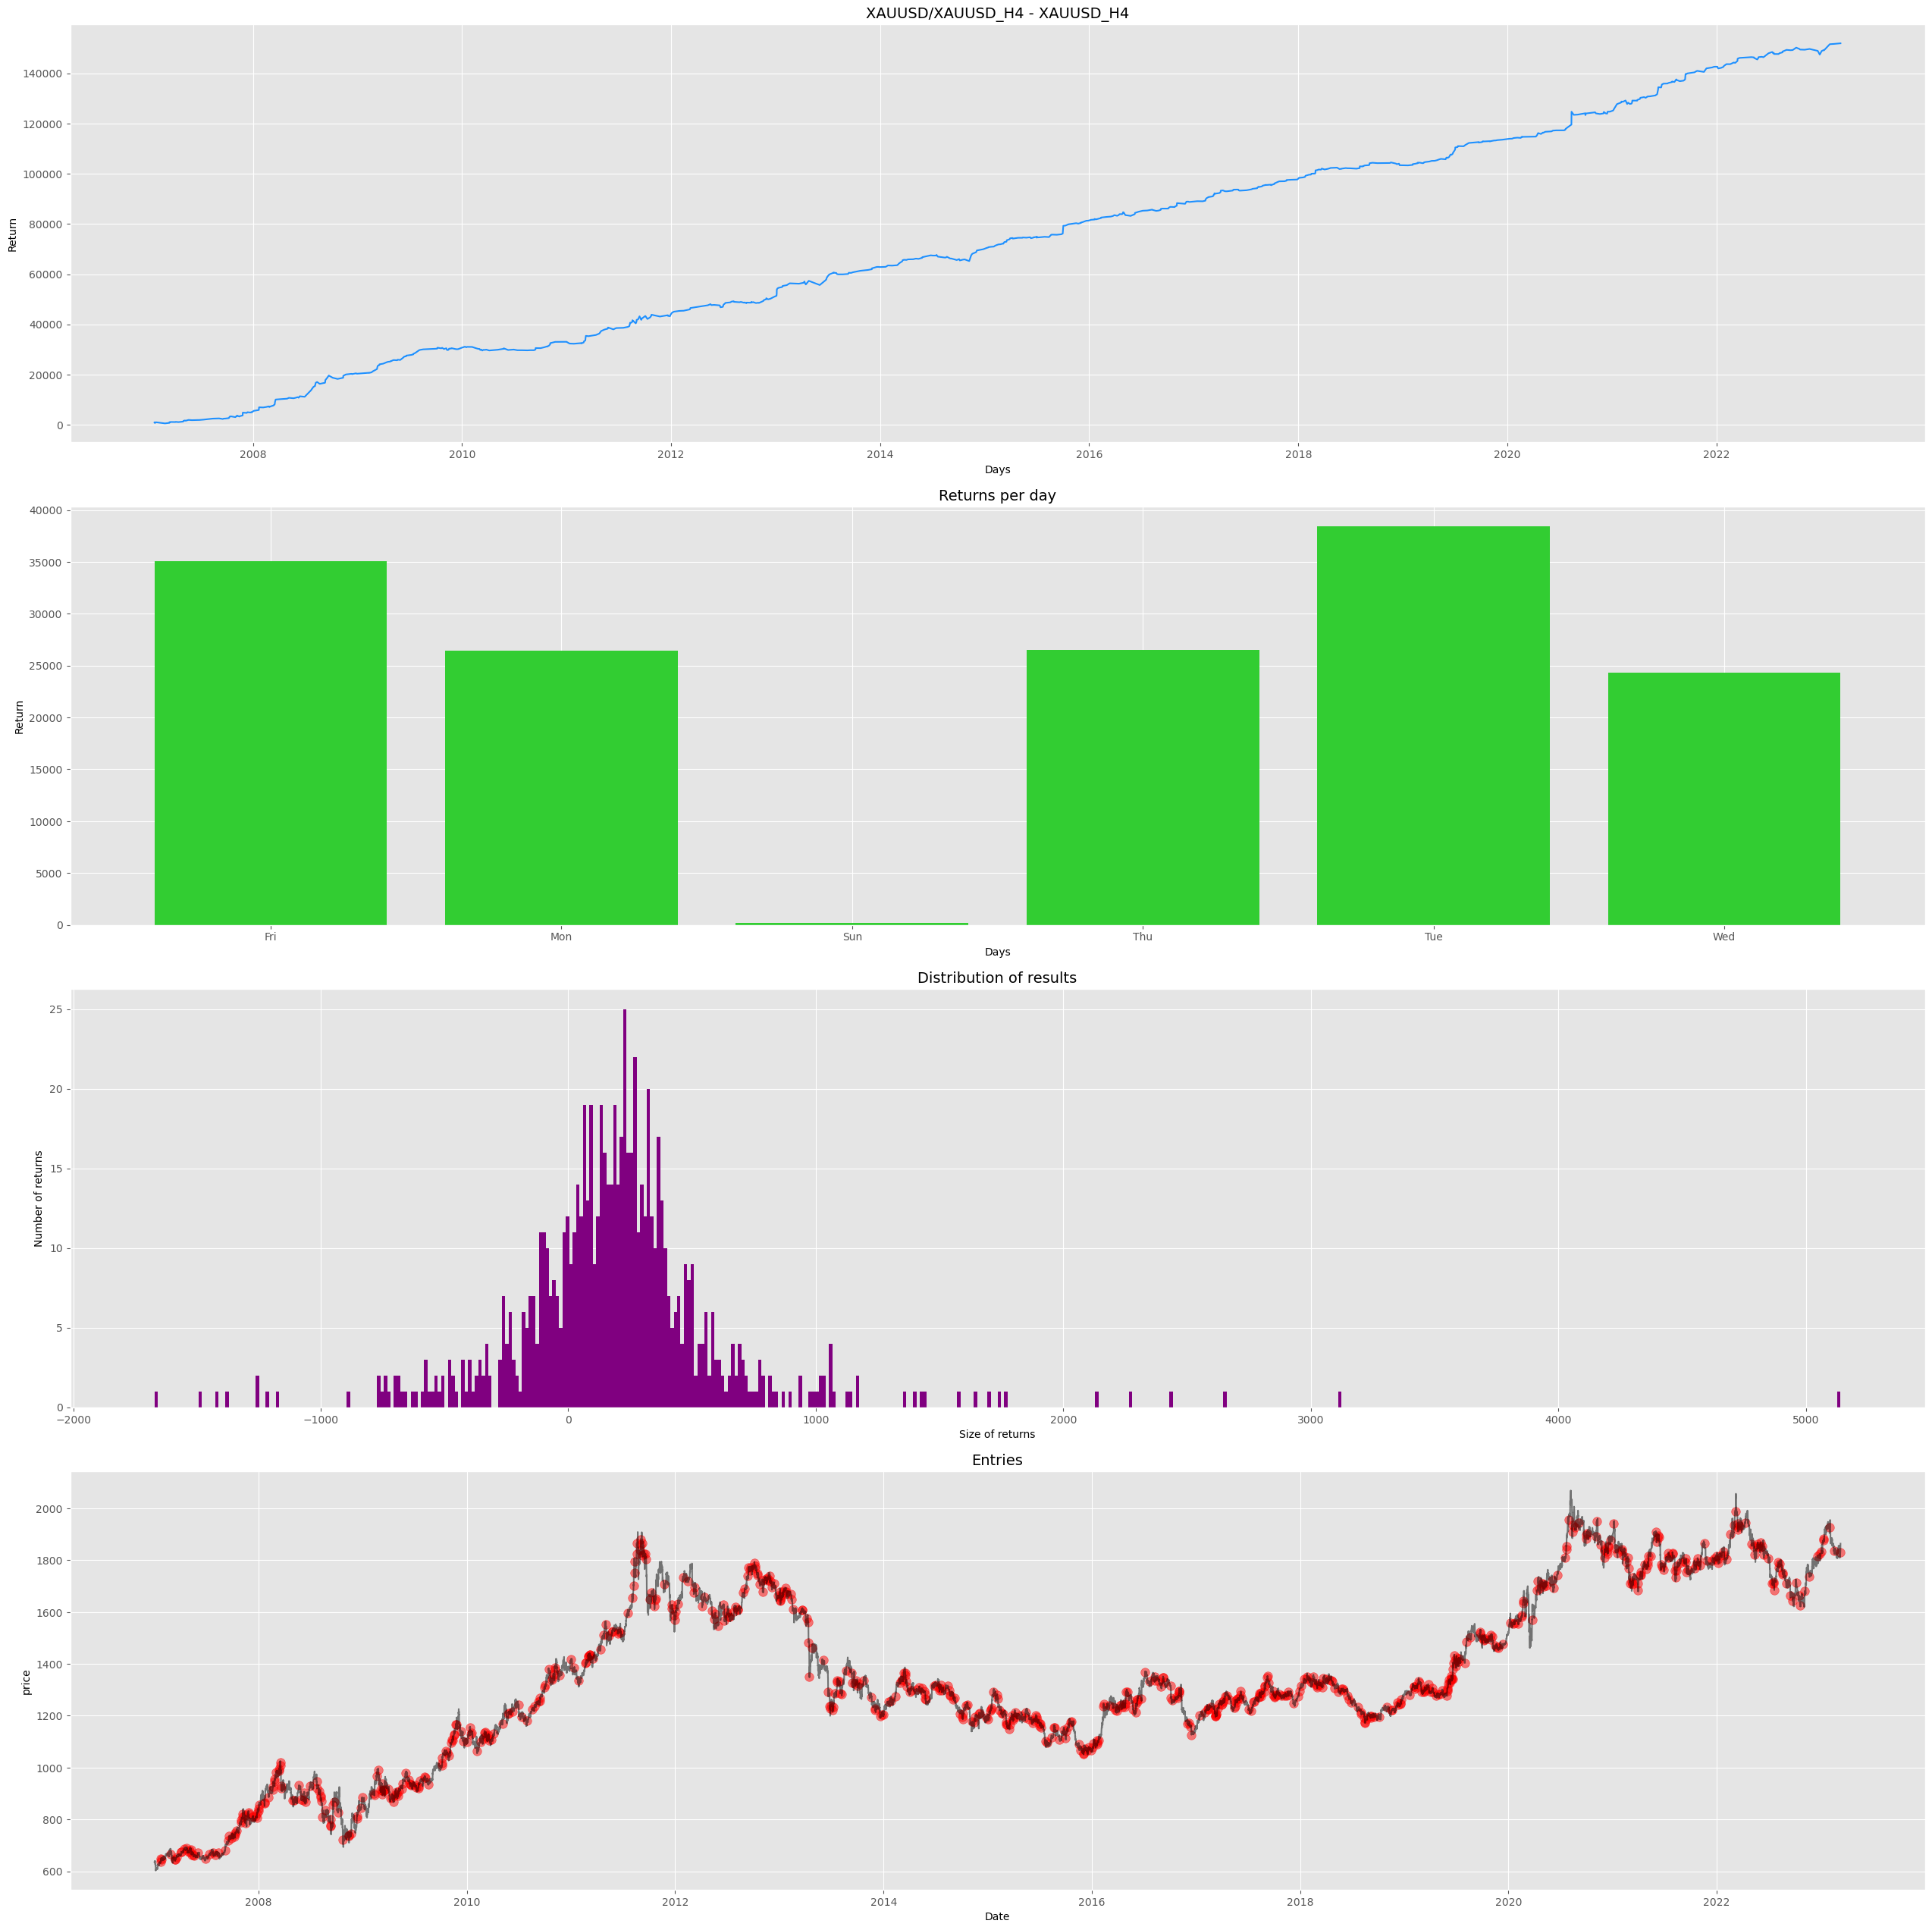

In [29]:
# performance for each pair
for pair in range(len(pairs_list)):
    print(pairs_list[pair], '- PERFORMANCE')
    print('--------------------------------')
    print('Number of trades:', len(profits[pair] + losses[pair] + be[pair]))
    print('Number of profits:', len(profits[pair]))
    print('Number of losses:', len(losses[pair]))
    print('Number of breakevens:', len(be[pair]), '\n')
    print('Winning percentage', (round(
        len(profits[pair]) / (len(profits[pair]) + len(losses[pair])) * 100, 2)), '%')
    print('ROI:', round(pairs_results[pair]['cum_res'][-1] - account_size, 2))
    print('--------------------------------')
    print('Average profitable trade:', round(
        sum(profits[pair]) / len(profits[pair]), 2))
    print('Average lossing trade:', round(
        sum(losses[pair]) / len(losses[pair]), 2))
    print('Max profitable trade:', round(max(profits[pair]), 2))
    print('Max lossing trade:', round(min(losses[pair]), 2))
    print('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx \n')

    trades_per_day = pairs_results[pair].groupby(
        'day_of_trade').count()['result']
    day_return = pairs_results[pair].groupby('day_of_trade').sum()['result']
    day_return_positive = day_return > 0

    print('Number of trades per day \n', trades_per_day)

    fig, axes = plt.subplots(4, 1, figsize=(26, 26))
    fig.tight_layout(pad=4)

    axes[0].plot(pairs_results[pair]['cum_res'], color='dodgerblue')
    axes[0].set_title(pairs_list[pair], fontsize=14)
    axes[0].set_xlabel('Days')
    axes[0].set_ylabel('Return')

    axes[1].bar(day_return.keys(), height=day_return, color=day_return_positive.map(
        {True: 'limegreen', False: 'coral'}))
    axes[1].set_title('Returns per day', fontsize=14)
    axes[1].set_xlabel('Days')
    axes[1].set_ylabel('Return')

    axes[2].hist(pairs_results[pair]['result'], bins=500, color='purple')
    axes[2].set_title('Distribution of results', fontsize=14)
    axes[2].set_xlabel('Size of returns')
    axes[2].set_ylabel('Number of returns')

    axes[3].plot(df[pair]['Close'], color='black', alpha=0.5)
    axes[3].scatter(pairs_results[pair].index, pairs_results[pair]
                    ['entry_price'], s=70, color='red', alpha=0.5)
    axes[3].set_title('Entries', fontsize=14)
    axes[3].set_xlabel('Date')
    axes[3].set_ylabel('price')

    plt.show()